<p style="text-align:center">
    <a href="https://www.ptit.edu.vn" target="_blank">
        <img src="https://i.imgur.com/XBSxCH1.png" width="400" alt="PTIT Logo">
    </a>
</p>


<center>

# **Practice lab: Cardiovascular Prediction**

</center>


### THƯ VIỆN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import copy

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn import preprocessing
from numpy.random import seed
np.random.seed(2095)

### ĐỌC DỮ LIỆU TỪ DATASET

In [2]:
file_path = r'D:\PTIT-CNN-Prediction-Cardiovascular\CardiacPrediction.xlsx'
ipData = pd.read_excel(file_path, sheet_name='CoroHeartDis')
print(ipData.columns) 

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')


### KHAI PHÁ DỮ LIỆU

In [3]:
ipData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37079 entries, 0 to 37078
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SEQN                         37079 non-null  int64  
 1   Gender                       37079 non-null  int64  
 2   Age                          37079 non-null  int64  
 3   Annual-Family-Income         37079 non-null  int64  
 4   Ratio-Family-Income-Poverty  37079 non-null  float64
 5   X60-sec-pulse                37079 non-null  int64  
 6   Systolic                     37079 non-null  int64  
 7   Diastolic                    37079 non-null  int64  
 8   Weight                       37079 non-null  float64
 9   Height                       37079 non-null  float64
 10  Body-Mass-Index              37079 non-null  float64
 11  White-Blood-Cells            37079 non-null  float64
 12  Lymphocyte                   37079 non-null  float64
 13  Monocyte        

In [4]:
ipData.describe()

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
count,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,...,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000,37079.000000
mean,48901.041236,1.513282,48.943661,7.358208,2.559026,72.579250,124.090078,69.919253,80.988276,167.389601,...,5.081713,1.370344,5.676496,1.783840,1.598856,1.218587,1.907333,1.549502,1.796165,0.040670
std,26753.636441,0.499830,18.010440,3.994083,1.624789,12.242108,19.254741,13.575804,20.678734,10.122908,...,1.072682,0.415985,1.050223,0.448324,0.511199,0.461102,0.349674,0.497550,0.402853,0.197527
min,2.000000,1.000000,20.000000,1.000000,0.000000,32.000000,0.000000,0.000000,32.300000,129.700000,...,1.530000,0.160000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,26120.500000,1.000000,33.000000,4.000000,1.140000,64.000000,111.000000,62.000000,66.500000,160.000000,...,4.320000,1.070000,5.200000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
50%,50065.000000,2.000000,48.000000,7.000000,2.180000,72.000000,121.000000,70.000000,78.200000,167.100000,...,5.020000,1.290000,5.400000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
75%,71173.500000,2.000000,63.000000,10.000000,4.130000,80.000000,134.000000,78.000000,92.100000,174.600000,...,5.740000,1.600000,5.800000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.000000
max,93702.000000,2.000000,85.000000,15.000000,5.000000,224.000000,270.000000,132.000000,371.000000,204.500000,...,14.090000,5.840000,18.800000,3.000000,3.000000,9.000000,3.000000,2.000000,2.000000,1.000000


### GIẢI THÍCH BỘ DỮ LIỆU LÂM SÀNG
- Chỉ số nhân khẩu học
    - Gender, Age: Giới tính và tuổi của bệnh nhân
    - SEQN: Mã định danh người tham gia
    - Annual-Family-Income: Thu nhập hàng năm của hộ gia đình
    - Ratio-Family-Income-Poverty: Tỷ lệ thu nhập hộ gia đình và ngưỡng nghèo liên bang
- Thông tin sinh lý cơ bản
    - X60-sec-pulse: Nhịp tim (số lần đập/phút)
    - Systolic: Huyết áp tâm thu
    - Diastolic: Huyết áp tâm trương
    - Weight: Trọng lượng
    - Height: Chiều cao
    - Body-Mass-Index: Chỉ số khối cơ thể (BMI)
- Chỉ số huyết học
    - White-Blood-Cells (WBC): Số lượng bạch cầu (10^3/μL), giúp đánh giá tình trạng nhiễm trùng hoặc các bệnh lý miễn dịch
    - Lymphocyte: Phần trăm lymphocyte, một loại bạch cầu liên quan đến miễn dịch
    - Monocyte: Phần trăm monocyte, tham gia vào việc chống lại nhiễm trùng
    - Eosinophils: Phần trăm bạch cầu ái toan, thường tăng trong các phản ứng dị ứng hoặc nhiễm ký sinh trùng
    - Basophils: Phần trăm bạch cầu ưa kiềm, liên quan đến các phản ứng dị ứng
    - Red-Blood-Cells (RBC): Số lượng hồng cầu (10^6/μL), đánh giá khả năng vận chuyển oxy
    - Hemoglobin (Hb): Nồng độ hemoglobin (g/dL), chỉ số quan trọng trong đánh giá thiếu máu
    - Mean-Cell-Vol (MCV): Thể tích trung bình của hồng cầu, giúp xác định loại thiếu máu
    - Mean-Cell-Hgb-Conc. (MCHC): Nồng độ hemoglobin trung bình trong một hồng cầu
    - Mean-cell-Hemoglobin (MCH): Lượng hemoglobin trung bình trong một hồng cầu
    - Platelet-count: Số lượng tiểu cầu (10^3/μL), liên quan đến khả năng đông máu
    - Mean-Platelet-Vol: Thể tích trung bình của tiểu cầu
    - Segmented-Neutrophils: Phần trăm bạch cầu trung tính, quan trọng trong đáp ứng miễn dịch
    - Hematocrit: Tỷ lệ phần trăm tế bào máu trong tổng thể tích máu
    - Red-Cell-Distribution-Width (RDW): Độ phân phối kích thước hồng cầu, thường tăng trong các dạng thiếu máu
- Chỉ số sinh hóa máu
    - Albumin: Protein trong huyết thanh, phản ánh tình trạng dinh dưỡng và chức năng gan
    - ALP (Alkaline Phosphatase): Enzym phosphatase kiềm, liên quan đến chức năng gan, mật và xương
    - AST (Aspartate Transaminase): Enzym liên quan đến tổn thương tế bào gan hoặc cơ tim
    - ALT (Alanine Transaminase): Enzym chỉ điểm tổn thương gan
    - Cholesterol: Cholesterol toàn phần (mmol/L), liên quan đến nguy cơ bệnh tim mạch
    - Creatinine: Sản phẩm thoái hóa của cơ, chỉ số chức năng thận
    - Glucose: Nồng độ đường trong máu, dùng để chẩn đoán bệnh tiểu đường
    - GGT (Gamma-Glutamyl Transferase): Enzym phản ánh tổn thương gan hoặc sử dụng rượu kéo dài
    - Iron: Hàm lượng sắt trong máu, liên quan đến bệnh thiếu máu hoặc quá tải sắt
    - LDH (Lactate Dehydrogenase): Enzym liên quan đến tổn thương tế bào
    - Phosphorus: Nồng độ photphat máu, quan trọng trong chức năng xương và thận
    - Bilirubin: Sản phẩm phân hủy của hemoglobin, chỉ điểm chức năng gan và mật
    - Protein: Tổng lượng protein trong huyết thanh
    - Uric.Acid: Nồng độ acid uric, liên quan đến bệnh gout
    - Triglycerides: Mỡ trung tính trong máu, liên quan đến bệnh lý tim mạch
    - Total-Cholesterol: Cholesterol toàn phần (mmol/L)
    - HDL: Cholesterol tốt (HDL), bảo vệ tim mạch
    - Glycohemoglobin (HbA1c): Chỉ số kiểm soát đường máu dài hạn, quan trọng trong bệnh tiểu đường
- Lối sống và yếu tố gia đình
    - Vigorous-work: Mức độ tham gia công việc nặng (mã hóa: 1 - Thấp, 3 - Cao)
    - Moderate-work: Mức độ tham gia công việc vừa (mã hóa tương tự)
    - Health-Insurance: Có bảo hiểm y tế hay không (1: Có, 2: Không)
    - Diabetes: Tiền sử bệnh tiểu đường (1: Có, 2: Không)
    - Blood-Rel-Diabetes: Có người thân bị tiểu đường (1: Có, 2: Không)
    - Blood-Rel-Stroke: Có người thân bị đột quỵ (1: Có, 2: Không)
- Biến mục tiêu
    - CoronaryHeartDisease: Biến mục tiêu, biểu thị bệnh tim mạch vành (0: Không mắc, 1: Mắc)

In [5]:
ipData['CoronaryHeartDisease'].value_counts()

CoronaryHeartDisease
0    35571
1     1508
Name: count, dtype: int64

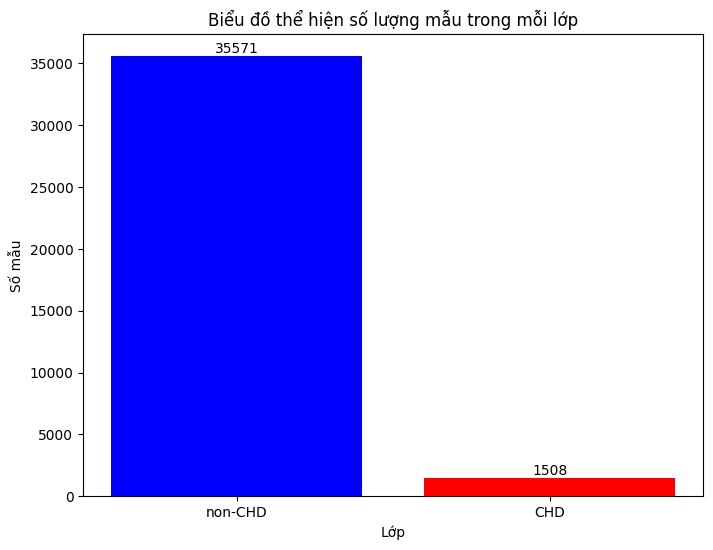

In [118]:
import matplotlib.pyplot as plt

# Number of samples in each class
class_counts = [35571, 1508]
class_labels = ['non-CHD', 'CHD']

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(class_labels, class_counts, color=['blue', 'red'])

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Set labels and title
plt.xlabel('Lớp')
plt.ylabel('Số mẫu')
plt.title('Biểu đồ thể hiện số lượng mẫu trong mỗi lớp')

# Show plot
plt.show()

📶  Có thể thấy sự mất cân bằng dữ liệu rất lớn trên tập dữ liệu này với tỉ lệ 1:35 (Người mắc bệnh : Người không mắc bệnh)

### TIỀN XỬ LÝ DỮ LIỆU

Kiểm tra các giá trị khuyết (Null, NaN)

In [6]:
null_counts = ipData.isnull().sum()
print(null_counts)

SEQN                           0
Gender                         0
Age                            0
Annual-Family-Income           0
Ratio-Family-Income-Poverty    0
X60-sec-pulse                  0
Systolic                       0
Diastolic                      0
Weight                         0
Height                         0
Body-Mass-Index                0
White-Blood-Cells              0
Lymphocyte                     0
Monocyte                       0
Eosinophils                    0
Basophils                      0
Red-Blood-Cells                0
Hemoglobin                     0
Mean-Cell-Vol                  0
Mean-Cell-Hgb-Conc.            0
Mean-cell-Hemoglobin           0
Platelet-count                 0
Mean-Platelet-Vol              0
Segmented-Neutrophils          0
Hematocrit                     0
Red-Cell-Distribution-Width    0
Albumin                        0
ALP                            0
AST                            0
ALT                            0
Cholestero

❌ Không có giá trị NULL trong bộ dữ liệu 

Kiểm tra trùng lặp

❌ Không có giá trị trùng lặp trong bộ dữ liệu 

### CHỌN LỌC BIẾN BẰNG HỒI QUY LASSO VÀ BỎ PHIẾU ĐA SỐ

### Hồi quy Lasso là gì?

**Hồi quy Lasso (Lasso Regression)** là một kỹ thuật trong phân tích dữ liệu và học máy, được sử dụng để thực hiện **hồi quy tuyến tính** trong đó có một bước điều chỉnh đặc biệt để giúp giảm thiểu mô hình quá phức tạp hoặc bị **overfitting**.

### Các Khái Niệm Cơ Bản:
- **Hồi quy tuyến tính (Linear Regression):** Là một mô hình thống kê dùng để dự đoán giá trị của biến phụ thuộc (y) từ các biến độc lập (x).
- **Overfitting:** Là hiện tượng khi mô hình học quá kỹ vào dữ liệu huấn luyện, dẫn đến việc không tổng quát được khi gặp dữ liệu mới.

### Lasso Regression:
- **Lasso** là viết tắt của **Least Absolute Shrinkage and Selection Operator**. Kỹ thuật này không chỉ thực hiện hồi quy tuyến tính mà còn có khả năng **chọn lọc đặc trưng** (feature selection).
- Lasso thêm vào một điều kiện ràng buộc (penalty term) vào trong hàm mất mát (loss function) của hồi quy tuyến tính.

$$
\text{Loss function} = \text{RSS} + \lambda \sum_{i=1}^{p} |\beta_i|
$$

Trong đó:
- **RSS (Residual Sum of Squares):** Tổng bình phương sai số dự đoán.
- **\(\beta_i\):** Các hệ số hồi quy của các biến độc lập.
- **\(\lambda\):** Hệ số điều chỉnh (regularization parameter), điều chỉnh mức độ ảnh hưởng của phần ràng buộc. Khi \(\lambda\) tăng, mức độ “co lại” của các hệ số hồi quy càng mạnh.

## Đặc Điểm Của Lasso:
1. **Feature Selection:** Lasso có thể đẩy một số hệ số hồi quy về 0, giúp loại bỏ các biến không có ảnh hưởng lớn. Điều này giúp chọn ra những đặc trưng quan trọng trong mô hình, giảm bớt độ phức tạp của mô hình.
2. **Điều chỉnh độ phức tạp:** Thông qua hệ số \(\lambda\), Lasso giúp điều chỉnh mô hình sao cho không bị overfitting, đồng thời vẫn duy trì khả năng dự đoán chính xác.
3. **Sử dụng trong dữ liệu có nhiều đặc trưng (features):** Lasso rất hữu ích khi bạn có một lượng lớn đặc trưng và muốn giảm số lượng đặc trưng đầu vào, đồng thời duy trì độ chính xác của mô hình.

### So Với Ridge Regression:
- Cả **Lasso** và **Ridge Regression** đều là các phương pháp hồi quy có điều chỉnh (regularized regression), nhưng khác biệt chính giữa chúng là:
  - **Lasso** sử dụng điều chỉnh L1 (làm giảm các hệ số về 0), trong khi **Ridge** sử dụng điều chỉnh L2 (làm giảm các hệ số về giá trị nhỏ, nhưng không phải bằng 0).
  - Lasso có khả năng loại bỏ các đặc trưng không quan trọng, trong khi Ridge thường chỉ làm giảm chúng mà không loại bỏ hoàn toàn.

### Ứng Dụng:
- Lasso regression thường được sử dụng khi bạn muốn:
  - Tìm ra các biến độc lập quan trọng nhất trong một mô hình.
  - Giảm thiểu overfitting trong các mô hình có nhiều biến.
  - Dự đoán trong các bài toán hồi quy với nhiều đặc trưng.

Nhờ vào khả năng chọn lọc đặc trưng và giảm độ phức tạp mô hình, Lasso là một công cụ mạnh mẽ trong phân tích và học máy.


### Tạo biến mục tiêu và loại bỏ các cột không cần thiết

In [7]:
opLabel = np.array(ipData['CoronaryHeartDisease'])

# Loại bỏ các cột không cần thiết
ipData.drop(
    ['SEQN', 'CoronaryHeartDisease', 'Annual-Family-Income', 'Height', 
     'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Health-Insurance', 
     'Lymphocyte', 'Monocyte', 'Eosinophils', 'Total-Cholesterol', 
     'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.', 'Hematocrit', 'Segmented-Neutrophils'], 
    axis=1, 
    inplace=True
)

print(f"Số lượng biến trước khi tạo biến giả: {ipData.shape[1]}")

Số lượng biến trước khi tạo biến giả: 36


### Lý do xóa các cột được chỉ định trong Bộ dữ liệu


Trong danh sách này, có một số biến phụ thuộc tuyến tính về bản chất thu thập hoặc định 
lượng, cũng như một số biến không liên quan. Các biến này bao gồm: 
- Biến nhân khẩu học: Thu nhập hàng năm của gia đình, tỷ lệ thu nhập gia đình
nghèo. 
- Biến đo lường: Chiều cao, nhịp tim trong 60 giây. 
- Biến từ bảng câu hỏi: Bảo hiểm y tế. 
- Biến từ xét nghiệm máu: Lymphocyte, monocyte, eosinophil, cholesterol toàn 
phần, thể tích hồng cầu trung bình, nồng độ hemoglobin trung bình, hematocrit, 
neutrophil phân đoạn

Các biến này **không được xem xét** trong các bước xử lý và phân tích tiếp theo

In [8]:
# Chuyển đổi các biến phân loại thành biến giả
ipData = pd.get_dummies(ipData, columns=["Gender", "Diabetes", "Blood-Rel-Diabetes", 
                                 "Blood-Rel-Stroke", "Vigorous-work", "Moderate-work"])

# Kiểm tra số lượng biến sau chuyển đổi
print(f"Số lượng biến sau khi tạo biến giả: {ipData.shape[1]}")
df = ipData.copy()

# Lấy tên các cột biến đặc trưng và chuyển dataframe thành mảng numpy
varb = np.array(ipData.columns)
ipData = np.array(ipData)

# Khởi tạo mảng đếm tần suất (bỏ phiếu) cho các biến đặc trưng
featureVote = np.zeros(ipData.shape[1])

Số lượng biến sau khi tạo biến giả: 45


### Tại Sao Số Lượng Biến Tăng Lên 45 Sau Khi One-Hot Encoding

Sau khi loại bỏ các cột, còn **36 biến**. Khi chuyển đổi các biến phân loại thành các biến giả (dummy variables) bằng lệnh `pd.get_dummies`, số lượng biến tăng lên thành **45**. Sự gia tăng này xảy ra vì mỗi biến phân loại được thay thế bằng nhiều cột nhị phân (0 hoặc 1), một cột cho mỗi hạng mục duy nhất trong các biến đó.

---

### Giải Thích Chi Tiết

Hãy phân tích các biến phân loại và số lượng biến giả có thể đã được tạo ra:

1. **`Gender`**:
   - Hạng mục có thể: **`1`, `2`**  
   - Tạo ra: **2 biến giả** – `Gender_1`, `Gender_2`

2. **`Diabetes`**:
   - Hạng mục có thể: **`1`, `2`, `3`**  
   - Tạo ra: **3 biến giả** – `Diabetes_1`, `Diabetes_2`, `Diabetes_3`

3. **`Blood-Rel-Diabetes`**:
   - Hạng mục có thể: **`1`, `2`**  
   - Tạo ra: **2 biến giả** – `Blood-Rel-Diabetes_1`, `Blood-Rel-Diabetes_2`

4. **`Blood-Rel-Stroke`**:
   - Hạng mục có thể: **`1`, `2`**  
   - Tạo ra: **2 biến giả** – `Blood-Rel-Stroke_1`, `Blood-Rel-Stroke_2`

5. **`Vigorous-work`**:
   - Hạng mục có thể: **`1`, `2`, `3`**  
   - Tạo ra: **3 biến giả** – `Vigorous-work_1`, `Vigorous-work_2`, `Vigorous-work_3`

6. **`Moderate-work`**:
   - Hạng mục có thể: **`1`, `2`, `3`**  
   - Tạo ra: **3 biến giả** – `Moderate-work_1`, `Moderate-work_2`, `Moderate-work_3`

---

### Tổng Số Biến Giả Được Tạo Ra

| Biến Phân Loại            | Số Biến Giả Được Tạo |
|----------------------------|----------------------|
| **Gender**                 | 2                    |
| **Diabetes**               | 3                    |
| **Blood-Rel-Diabetes**     | 2                    |
| **Blood-Rel-Stroke**       | 2                    |
| **Vigorous-work**          | 3                    |
| **Moderate-work**          | 3                    |
| **Tổng Cộng**              | **15**               |

---

### Tính Toán Số Biến Cuối Cùng

1. **Trước Khi One-Hot Encoding**: 36 biến  
2. **Sau Khi Thêm 15 Biến Giả**:  
   \[
   36 + 15 = 51
   \]

Tuy nhiên, vì `pd.get_dummies` thường **loại bỏ một biến giả cho mỗi biến phân loại** (để tránh bẫy biến giả hoặc hiện tượng đa cộng tuyến), nên sự gia tăng sẽ thấp hơn một chút:

- Số lượng tăng thêm thường là:  
  \[
  \text{Số lượng biến giả mới} = (\text{Tổng số hạng mục} - \text{Số lượng biến phân loại})
  \]

Trong trường hợp này, tổng số biến cuối cùng là **45** do sự điều chỉnh trên.

---



### MA TRẬN TƯƠNG QUAN CỦA 30 BIẾN DỰ ĐOÁN

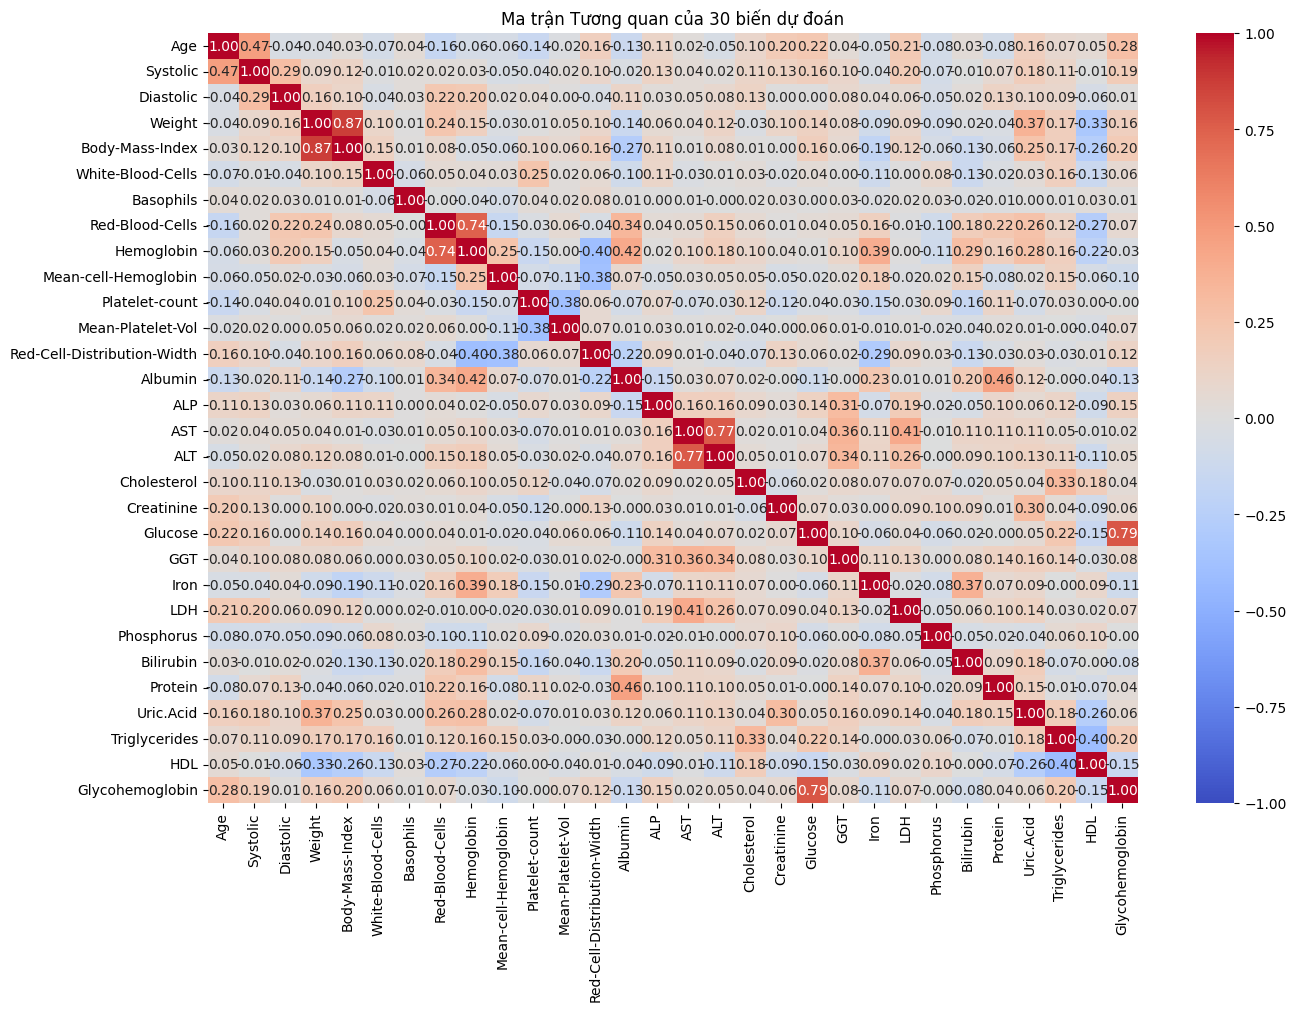

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select the first 30 characteristic predictor variables
selected_columns = varb[:30]

# Compute the correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận Tương quan của 30 biến dự đoán')
plt.show()

### CÁC ĐẶC TRƯNG CÓ MỐI TƯƠNG QUAN MẠNH
- BMI & Weight: 0.87
- Hemoglobin & Mean Cell Hemoglobin: 0.74
- AST & ALT: 0.77
- Glycohemoglobin & Glucose: 0.79

In [10]:
iteR = 100  # Số lần lặp lại

# Vòng lặp chọn lọc biến
for num in range(iteR):
    # Phân chia dữ liệu theo hai lớp
    label0_indx = np.where(opLabel == 0)[0]
    label1_indx = np.where(opLabel == 1)[0]
    numTrainData0 = 1300
    numTrainData1 = 1300

    # Xáo trộn chỉ số
    np.random.shuffle(label0_indx)
    np.random.shuffle(label1_indx)

    # Chia tập dữ liệu
    label0_indx_train = label0_indx[:numTrainData0-1]
    label1_indx_train = label1_indx[:numTrainData1-1]
    label0_indx_test  = label0_indx[numTrainData0-1:]
    label1_indx_test  = label1_indx[numTrainData1-1:]

    testIndx  = np.append(label0_indx_test,label1_indx_test)
    trainIndx = np.append(label0_indx_train,label1_indx_train)    
    trainData  =  ipData[trainIndx]
    trainLabel =  opLabel[trainIndx]
    testData   =  ipData[testIndx]
    testLabel  =  opLabel[testIndx]   

    # Chuẩn hóa dữ liệu
    scaler = preprocessing.StandardScaler().fit(trainData)
    trainData_scaled = scaler.transform(trainData)
    testData_scaled  = scaler.transform(testData)

    # Hồi quy Lasso
    regr = Lasso(random_state=0, alpha=0.006, tol=0.000001, max_iter=100000)
    regr.fit(trainData_scaled, trainLabel)

    # Ghi nhận các biến có trọng số khác 0
    cof = np.abs(regr.coef_)
    colIndx = np.where(cof != 0)[0]
    for col in colIndx:
        featureVote[col] += 1

In [11]:
print(featureVote)
print(iter)

[100.  33.  82.  39.  14.  91.  50.  67.   9.  19. 100.  49. 100.  47.
  26.  24.   9. 100.  88.  14.  36.  33. 100.  24.  47.  25. 100.  99.
  96.  95. 100.  59.  86.  73.   5.  87.  49. 100.  60.  14.  13.  89.
   2.  99.  64.]
<built-in function iter>


In [12]:
print(varb[30:])


['Gender_1' 'Gender_2' 'Diabetes_1' 'Diabetes_2' 'Diabetes_3'
 'Blood-Rel-Diabetes_1' 'Blood-Rel-Diabetes_2' 'Blood-Rel-Stroke_1'
 'Blood-Rel-Stroke_2' 'Vigorous-work_1' 'Vigorous-work_2'
 'Vigorous-work_3' 'Moderate-work_1' 'Moderate-work_2' 'Moderate-work_3']


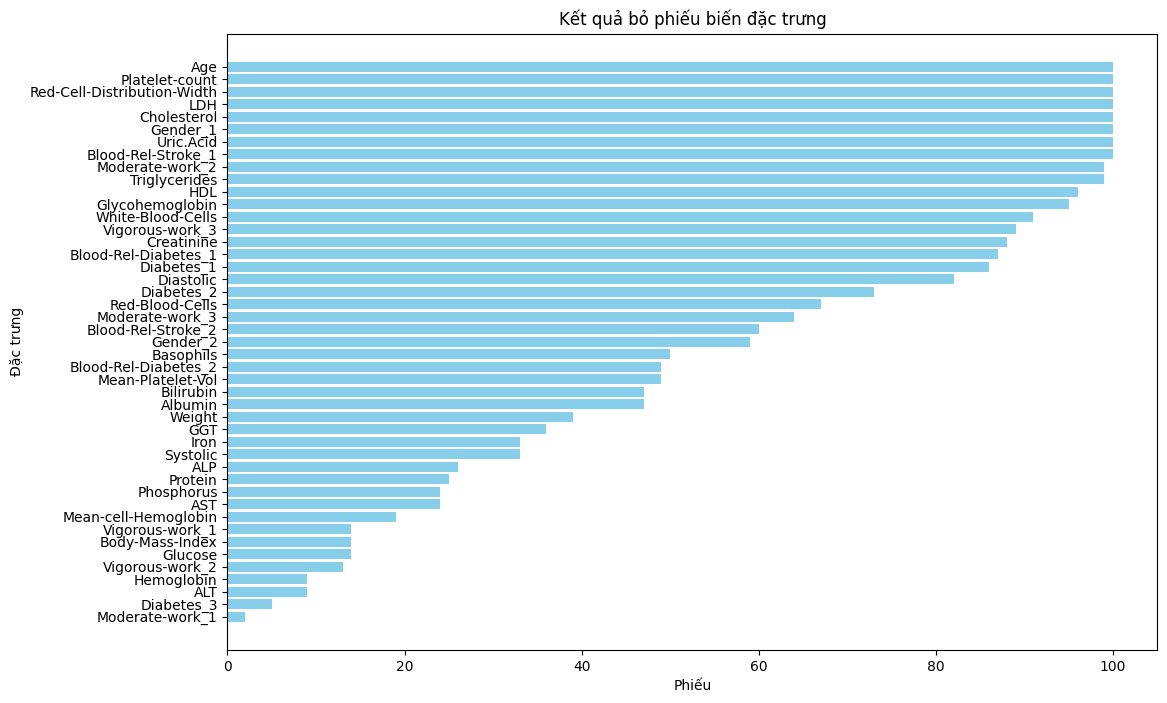

In [13]:
import matplotlib.pyplot as plt

# Create a DataFrame for better visualization
feature_vote_ipData = pd.DataFrame({
    'Feature': varb,
    'Feature Vote': featureVote
})

# Sort the DataFrame by 'Feature Vote' in descending order
feature_vote_ipData = feature_vote_ipData.sort_values(by='Feature Vote', ascending=False)

# Plot the feature votes
plt.figure(figsize=(12, 8))
plt.barh(feature_vote_ipData['Feature'], feature_vote_ipData['Feature Vote'], color='skyblue')
plt.xlabel('Phiếu')
plt.ylabel('Đặc trưng')
plt.title('Kết quả bỏ phiếu biến đặc trưng')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest votes at the top
plt.show()

                 Feature  Feature Vote
42       Moderate-work_1           2.0
34            Diabetes_3           5.0
16                   ALT           9.0
8             Hemoglobin           9.0
40       Vigorous-work_2          13.0
19               Glucose          14.0
4        Body-Mass-Index          14.0
39       Vigorous-work_1          14.0
9   Mean-cell-Hemoglobin          19.0
15                   AST          24.0
23            Phosphorus          24.0
25               Protein          25.0
14                   ALP          26.0
1               Systolic          33.0
21                  Iron          33.0
20                   GGT          36.0
3                 Weight          39.0


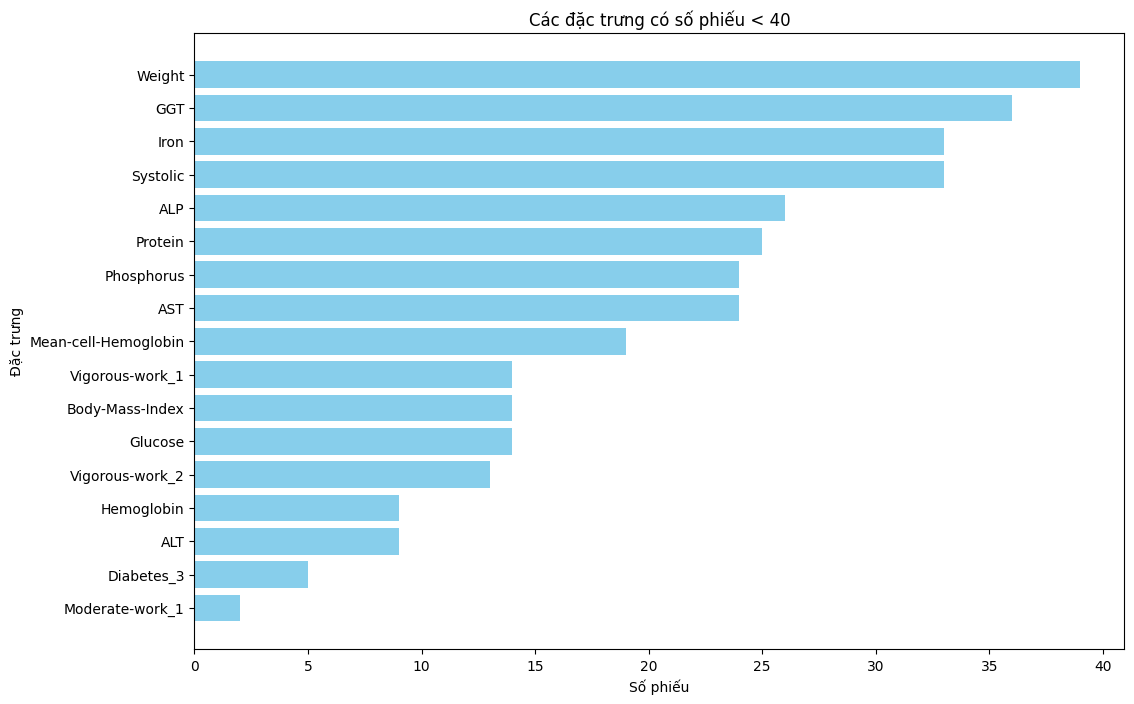

In [14]:
# Extract features with featureVote < 40
filtered_features = feature_vote_ipData[feature_vote_ipData['Feature Vote'] < 40]

# Sort the filtered features by 'Feature Vote' in ascending order
filtered_features = filtered_features.sort_values(by='Feature Vote')

# Print the filtered features
print(filtered_features)

# Plot the filtered features
plt.figure(figsize=(12, 8))
plt.barh(filtered_features['Feature'], filtered_features['Feature Vote'], color='skyblue')
plt.xlabel('Số phiếu')
plt.ylabel('Đặc trưng')
plt.title('Các đặc trưng có số phiếu < 40')
plt.show()

Trong machine learning, mức tương quan cao giữa các đặc trưng (predictor variables) có một số ý nghĩa và tác động quan trọng. Dưới đây là những điểm cần lưu ý:

---

### 1. **Hiện Tượng Đa Cộng Tuyến (Multicollinearity)**

- **Định nghĩa**: Khi hai hoặc nhiều đặc trưng có tương quan cao với nhau (ví dụ: trên 0.7 hoặc dưới -0.7), chúng có thể chứa thông tin trùng lặp.
  
- **Hậu quả**:
  - Làm cho mô hình khó xác định được hệ số quan trọng của từng đặc trưng.
  - Dẫn đến các hệ số hồi quy không ổn định, thay đổi lớn khi dữ liệu thay đổi nhỏ.
  - Giảm độ chính xác và khả năng giải thích của mô hình.
  
- **Ví dụ**: Trong mô hình hồi quy tuyến tính, nếu hai đặc trưng như "Weight" và "BMI" có tương quan cao, việc giữ cả hai có thể gây ra đa cộng tuyến.

---

### 2. **Ảnh Hưởng Đến Hiệu Suất Mô Hình**

- **Mô Hình Tuyến Tính**:  
  - Các thuật toán như **Linear Regression** hoặc **Logistic Regression** dễ bị ảnh hưởng bởi đa cộng tuyến.
  - Khi có đa cộng tuyến, mô hình có thể học kém hoặc đưa ra dự đoán không chính xác.

- **Mô Hình Cây Quyết Định (Decision Trees)**:  
  - Các mô hình như **Random Forest** hoặc **XGBoost** ít bị ảnh hưởng bởi tương quan cao vì chúng có thể tự động chọn ra đặc trưng quan trọng nhất.

---

### 3. **Giảm Số Chiều (Dimensionality Reduction)**

- **Giải pháp**:
  - Sử dụng **Principal Component Analysis (PCA)** để giảm số lượng đặc trưng có liên quan đến nhau.
  - Chọn một trong các đặc trưng có tương quan cao thay vì giữ tất cả.
  
- **Lợi ích**:
  - Giảm độ phức tạp của mô hình.
  - Tăng hiệu suất tính toán và độ chính xác.
  
---

### 4. **Ví Dụ Thực Tế**

- Nếu bạn có hai đặc trưng như **"Diastolic"** và **"Systolic"** (cả hai đều là huyết áp), mức tương quan cao giữa chúng chỉ ra rằng bạn có thể loại bớt một đặc trưng mà không làm mất nhiều thông tin.
  
---

### **Tóm Tắt**:

- **Tương quan cao** giữa các đặc trưng có thể dẫn đến:
  1. **Multicollinearity** làm giảm độ chính xác và khả năng giải thích của mô hình.
  2. **Giảm hiệu suất** trong các mô hình tuyến tính.
  3. **Cần áp dụng kỹ thuật** như PCA hoặc chọn lọc đặc trưng để xử lý.


### TÌM NGƯỠNG HỢP LÝ

- Xét thấy các biến có mối tương quan cao là các cặp sau
    - BMI & Weight: 0.87
    - Hemoglobin & Mean Cell Hemoglobin: 0.74
    - AST & ALT: 0.77
    - Glycohemoglobin & Glucose: 0.79

- Mối tương quan cao giữa ALT và AST được tìm thấy trong ma trận tương quan, tuy nhiên AST là một yếu tố nguy cơ chính trong việc dự đoán bệnh mạch vành (CHD) như đã được báo cáo trong một nghiên cứu về bệnh tim mạch vành của Jianying (2015), họ cho rằng mức cao AST đáng kể ở bệnh nhân CHD so với nhóm đối chứng và do đó có thể được sử dụng như các dấu hiệu sinh hóa để dự đoán mức độ nghiêm trọng của CHD
- Mối tương quan cao giữa chỉ số khối cân nặng BMI và cân nặng điều này có vẻ bình thường, trong khi mối tương quan giữa hemoglobin và hồng cầu là 0.74. Trong một nghiên cứu lâm sàng của Madjid (2013) cho thấy mối quan hệ giữa hemoglobin và CHD rất cao
- Mối tương quan cao giữa Glucose và Glycohemoglobin, nghiên cứu chỉ ra mức đường huyết cao ở những bệnh nhân không bị tiểu đường có thể làm tăng nguy cơ phát triển CHD (Neilson 2016)

------
- Để xác định các biến có đóng góp vào sự biến đổi trong dữ liệu, tôi áp dụng hồi quy LASSO trên 100 mẫu dữ liệu ngẫu nhiên, mỗi mẫu chứa 1300 ví dụ của lớp CHD và lớp non-CHD. Về mặt logic, ta cần loại bỏ một đặc trưng trong một cặp đặc trưng có mối tương quan cao. Nhận thấy 4 đặc trưng, từ bảng FeatureVote ta loại được ALT, Hemoglobin, BMI và Glucose, suy ra ngưỡng cần đặt là 15


In [15]:
# Đặt ngưỡng tần suất
thresH = 15

# Chọn các biến có tần suất >= ngưỡng
featureIndx = np.where(featureVote[0:30] >= thresH)[0]

# Giữ lại các biến từ vị trí 30 trở đi
featureIndx = np.append(featureIndx, np.arange(30, ipData.shape[1]))

# Kiểm tra số lượng biến được chọn
print(f"Số lượng biến được chọn: {len(featureIndx)}")

# Lấy tên các biến được chọn
selected_features_via_threshold = varb[featureIndx]

# In các biến được chọn
print("Các biến đặc trưng được chọn:")
for feature in selected_features_via_threshold:
    print(feature)

Số lượng biến được chọn: 41
Các biến đặc trưng được chọn:
Age
Systolic
Diastolic
Weight
White-Blood-Cells
Basophils
Red-Blood-Cells
Mean-cell-Hemoglobin
Platelet-count
Mean-Platelet-Vol
Red-Cell-Distribution-Width
Albumin
ALP
AST
Cholesterol
Creatinine
GGT
Iron
LDH
Phosphorus
Bilirubin
Protein
Uric.Acid
Triglycerides
HDL
Glycohemoglobin
Gender_1
Gender_2
Diabetes_1
Diabetes_2
Diabetes_3
Blood-Rel-Diabetes_1
Blood-Rel-Diabetes_2
Blood-Rel-Stroke_1
Blood-Rel-Stroke_2
Vigorous-work_1
Vigorous-work_2
Vigorous-work_3
Moderate-work_1
Moderate-work_2
Moderate-work_3


In [16]:
# Tìm các chỉ số của tất cả các biến trong tập dữ liệu gốc
tInx = np.arange(ipData.shape[1])

# Tìm các chỉ số của các biến không nằm trong danh sách được chọn
rrInx = tInx[~np.isin(tInx, featureIndx)]

# Lấy tên các biến bị loại bỏ
removed_features = varb[rrInx]
print(f"Số lượng biến bị loại bỏ: {len(removed_features)}")

# In danh sách các biến bị loại bỏ
print("Các biến đặc trưng bị loại bỏ sau chọn lọc:")
for feature in removed_features:
    print(feature)

Số lượng biến bị loại bỏ: 4
Các biến đặc trưng bị loại bỏ sau chọn lọc:
Body-Mass-Index
Hemoglobin
ALT
Glucose


### GIẢM TẬP DỮ LIỆU VÀ CHIA TẬP DỮ LIỆU HUẤN LUYỆN & KIỂM TRA

**MỤC ĐÍCH**
- Giảm kích thước dữ liệu bằng cách chỉ giữ lại các biến đặc trưng đã chọn thông qua hồi quy Lasso
- Chia dữ liệu thành tập huấn luyện (train) và kiểm tra (test) với số lượng mẫu được xác định riêng cho từng lớp (lớp 0 và lớp 1)
- Chuẩn hóa dữ liệu để sẵn sàng sử dụng trong các mô hình học máy
- Cho phép thay đổi kích thước tập huấn luyện bằng cách chỉnh sửa các biến numTrainData0 (số mẫu của lớp 0) và numTrainData1 (số mẫu của lớp 1)

### Lý do chuẩn hóa dữ liệu
- Chuẩn hóa bằng StandardScaler giúp đưa các đặc trưng về cùng một khoảng giá trị (trung bình 0 và độ lệch chuẩn 1).
- Điều này cần thiết cho các thuật toán nhạy cảm với khoảng cách giữa các điểm dữ liệu như:
    - Hồi quy tuyến tính
    - K-Nearest Neighbors
    - SVM (Support Vector Machine)

In [28]:
# Giảm tập dữ liệu với các biến đặc trưng đã chọn từ dataframe ipData
reduced_data = ipData[:,featureIndx]

# Tìm chỉ số của hai lớp (0 và 1)
label0_indx = np.where(opLabel == 0)[0]  # Lớp 0 (không bị bệnh)
label1_indx = np.where(opLabel == 1)[0]  # Lớp 1 (bị bệnh)

# Định nghĩa số lượng mẫu cho tập huấn luyện
numTrainData0 = 3900  # Số mẫu lớp 0 trong tập huấn luyện
numTrainData1 = 1300  # Số mẫu lớp 1 trong tập huấn luyện

# Xáo trộn chỉ số
np.random.shuffle(label0_indx)
np.random.shuffle(label1_indx)

# Chia tập huấn luyện và kiểm tra
label0_indx_train = label0_indx[0:numTrainData0]
label1_indx_train = label1_indx[0:numTrainData1]
label0_indx_test  = label0_indx[numTrainData0:]
label1_indx_test  = label1_indx[numTrainData1:]

# Gộp chỉ số của hai lớp
testIndx = np.append(label0_indx_test, label1_indx_test)
trainIndx = np.append(label0_indx_train, label1_indx_train)

# Tạo tập huấn luyện và kiểm tra
x_train = reduced_data[trainIndx]
y_train = opLabel[trainIndx]
x_test = reduced_data[testIndx]
y_test = opLabel[testIndx]

# Chuẩn hóa dữ liệu
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Sao lưu dữ liệu chuẩn hóa
x_train_org = copy.deepcopy(x_train)
x_test_org = copy.deepcopy(x_test)
y_train_org = copy.deepcopy(y_train)
y_test_org = copy.deepcopy(y_test)

# Kết quả tập dữ liệu huấn luyện và kiểm tra
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((5200, 41), (5200,), (31879, 41), (31879,))

In [23]:
print(len(label0_indx_test))

31671




## 1. **Kích Thước của Tập Huấn Luyện (`x_train`, `y_train`)**

- **`x_train.shape`**: `(5469, 41)`  
  - **5469**: Số lượng mẫu trong tập huấn luyện.  
    - 4300 mẫu từ lớp `0` (không bị bệnh)  
    - 1169 mẫu từ lớp `1` (bị bệnh)  
  - **41**: Số lượng đặc trưng (features) sau khi giảm và chọn lọc.

- **`y_train.shape`**: `(5469,)`  
  - Nhãn mục tiêu tương ứng với 5469 mẫu trong `x_train`.

### **Ý nghĩa:**
Tập huấn luyện bao gồm 5469 mẫu với 41 đặc trưng, được sử dụng để huấn luyện mô hình học máy.

---

## 2. **Kích Thước của Tập Kiểm Tra (`x_test`, `y_test`)**

- **`x_test.shape`**: `(31610, 41)`  
  - **31610**: Số lượng mẫu trong tập kiểm tra.  
    - Đây là các mẫu còn lại sau khi đã trích xuất 5469 mẫu cho tập huấn luyện.  
  - **41**: Số lượng đặc trưng giống như trong `x_train`.

- **`y_test.shape`**: `(31610,)`  
  - Nhãn mục tiêu tương ứng với 31610 mẫu trong `x_test`.

### **Ý nghĩa:**
Tập kiểm tra bao gồm 31610 mẫu với 41 đặc trưng, được sử dụng để đánh giá hiệu suất của mô hình trên dữ liệu mới mà mô hình chưa từng thấy trước đó.

---

## 3. **Tóm Tắt Ý Nghĩa Chung**

- **Tập huấn luyện (`x_train`, `y_train`)**:  
  Dùng để huấn luyện mô hình với 5469 mẫu dữ liệu đã chuẩn hóa.

- **Tập kiểm tra (`x_test`, `y_test`)**:  
  Dùng để kiểm tra và đánh giá mô hình với 31610 mẫu dữ liệu đã chuẩn hóa.

- **41 đặc trưng**: Là các đặc trưng còn lại sau khi thực hiện giảm bớt các biến không quan trọng bằng Lasso và bỏ phiếu đa số.

---

### **Nhận xét:**
- Tỉ lệ giữa tập huấn luyện và kiểm tra là khá hợp lý (khoảng 15% cho huấn luyện và 85% cho kiểm tra).
- Việc đảm bảo số lượng mẫu từ cả hai lớp trong tập huấn luyện giúp mô hình học tốt hơn, đặc biệt khi dữ liệu bị mất cân bằng.

### Tóm tắt ý nghĩa của quy trình
- Giảm đặc trưng giúp loại bỏ các biến không cần thiết, tối ưu hóa mô hình.
- One-Hot Encoding chuyển đổi biến phân loại thành dạng số học phù hợp.
- Chia tập huấn luyện và kiểm tra đảm bảo dữ liệu được phân bổ hợp lý, giúp mô hình học và đánh giá hiệu quả.
- Chuẩn hóa dữ liệu giúp cân bằng khoảng giá trị giữa các đặc trưng, hỗ trợ mô hình hoạt động tốt hơn.
- Quy trình này đảm bảo mô hình dự đoán bệnh mạch vành (CoronaryHeartDisease) được huấn luyện trên dữ liệu sạch và tối ưu, giúp cải thiện kết quả dự đoán.

### TRỰC QUAN HÓA DỮ LIỆU

### t-SNE Visualization

In [19]:
import imblearn
from collections import Counter
from sklearn.manifold import TSNE
import seaborn as sns

In [30]:
# Sử dụng t-SNE để giảm chiều dữ liệu xuống 3D

X_embedded = TSNE(n_components=3, max_iter=300, verbose=1).fit_transform(x_train)
# - `n_components=3`: Giảm chiều dữ liệu về 3 chiều để dễ trực quan hóa.
# - `n_iter=300`: Số lần lặp của thuật toán để hội tụ.
# - `verbose=1`: Hiển thị thông tin quá trình thực thi.
# - `fit_transform(x_train)`: Áp dụng t-SNE lên tập dữ liệu huấn luyện `x_train`.
# Kết quả: `X_embedded` là một mảng có kích thước (số mẫu, 3).

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5200 samples in 0.001s...
[t-SNE] Computed neighbors for 5200 samples in 0.146s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5200
[t-SNE] Computed conditional probabilities for sample 2000 / 5200
[t-SNE] Computed conditional probabilities for sample 3000 / 5200
[t-SNE] Computed conditional probabilities for sample 4000 / 5200
[t-SNE] Computed conditional probabilities for sample 5000 / 5200
[t-SNE] Computed conditional probabilities for sample 5200 / 5200
[t-SNE] Mean sigma: 1.739430
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.725227
[t-SNE] KL divergence after 300 iterations: 2.318681


C:\Users\baoho\AppData\Local\Temp\ipykernel_9564\505496209.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')


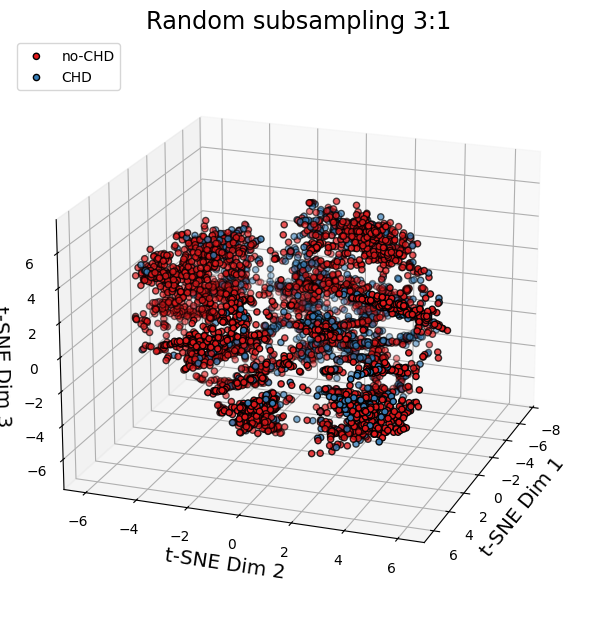

In [31]:
from mpl_toolkits.mplot3d import Axes3D

cin = sns.color_palette("Set1")[1]
edge_color = []
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('w')
ax.scatter(X_embedded[:,0],X_embedded[:,1],X_embedded[:,2],c=[sns.color_palette("Set1")[x] for x in y_train],\
           edgecolors='k',label='no-CHD')
ax.scatter(0,0,0,c=cin,edgecolors='k',label='CHD')
ax.azim = 20
ax.elev = 20
ax.set_xlabel("t-SNE Dim 1", size="x-large")
ax.set_ylabel("t-SNE Dim 2", size="x-large")
ax.set_zlabel("t-SNE Dim 3", size="x-large")
plt.title("Random subsampling 3:1",size="xx-large")
ax.legend(loc='upper left')
fig.set_size_inches(7.5,7.5)
fig.savefig('tSNE_RUS.png', dpi=100)

Biểu đồ này là một biểu diễn 3D sử dụng kỹ thuật **t-SNE (t-Distributed Stochastic Neighbor Embedding)** để giảm chiều dữ liệu và hiển thị mối quan hệ giữa các điểm dữ liệu. Dưới đây là phân tích cụ thể:

---

### **1. Ý nghĩa của t-SNE**

- **t-SNE** là một phương pháp giảm chiều dùng để biểu diễn dữ liệu đa chiều trong không gian 2D hoặc 3D một cách trực quan.
- Mục đích là bảo toàn mối quan hệ giữa các điểm dữ liệu sao cho các điểm gần nhau trong không gian gốc sẽ vẫn gần nhau trong không gian t-SNE.

---

### **2. Ý nghĩa Của Các Thành Phần trong Biểu Đồ**

- **Trục tọa độ**:  
  - `t-SNE Dim 1`, `t-SNE Dim 2`, `t-SNE Dim 3` là các chiều giảm được từ dữ liệu ban đầu.
- **Điểm dữ liệu**:  
  - **Chấm đỏ** đại diện cho nhóm **"no-CHD"** (không mắc bệnh động mạch vành).  
  - **Chấm xanh** đại diện cho nhóm **"CHD"** (mắc bệnh động mạch vành).
- **Tỉ lệ 3:1**:  
  - Đã áp dụng **random subsampling** với tỉ lệ **3:1**, tức là số lượng dữ liệu của nhóm "no-CHD" nhiều gấp 3 lần nhóm "CHD".  
  - Điều này giúp cân bằng lại dữ liệu nếu ban đầu nhóm "no-CHD" chiếm ưu thế.

---

### **3. Quan Sát từ Biểu Đồ**

1. **Phân cụm rõ ràng**:  
   - Các điểm dữ liệu tạo thành một số cụm lớn, cho thấy có thể có sự tương đồng giữa các mẫu trong cùng cụm.

2. **Sự xen kẽ giữa hai nhóm**:  
   - Các chấm đỏ ("no-CHD") và chấm xanh ("CHD") phân bố xen kẽ nhau khá nhiều.  
   - Điều này cho thấy có thể khó tách biệt hoàn toàn hai nhóm này dựa trên các đặc trưng đang xét.

3. **Nhóm "CHD" có mật độ thấp hơn**:  
   - Do subsampling, số lượng điểm xanh ít hơn, nhưng chúng vẫn xuất hiện trong hầu hết các cụm lớn.

4. **Khả năng phân loại**:  
   - Nếu hai nhóm không phân tách rõ ràng, có thể mô hình phân loại sẽ gặp khó khăn hoặc cần thêm đặc trưng khác để cải thiện.

---

### **4. Kết Luận**

- **Biểu đồ này cho thấy**:  
  - Hai nhóm "no-CHD" và "CHD" có sự tương đồng đáng kể, với một số vùng có thể phân tách tốt hơn.  
  - Cần tiếp tục phân tích và có thể thử thêm các phương pháp khác để cải thiện khả năng phân loại hoặc chọn lọc đặc trưng phù hợp hơn.



In [32]:
# Chuyển đổi dữ liệu `x_train` và `x_test` thành định dạng phù hợp cho mô hình (CNN)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

Việc chuyển đổi dữ liệu `x_train` và `x_test` thành định dạng `(số mẫu, số đặc trưng, 1)` là cần thiết khi sử dụng mô hình **CNN (Convolutional Neural Network)** cho dữ liệu dạng bảng hoặc dữ liệu có cấu trúc. Dưới đây là lý do chi tiết cho việc thực hiện bước chuyển đổi này:

---

## 1. **Đặc điểm Đầu Vào của CNN**

- **CNN** được thiết kế để làm việc với dữ liệu có cấu trúc không gian (ví dụ: hình ảnh 2D, chuỗi 1D).
- Đầu vào của CNN cần có một trục bổ sung gọi là **channel** (kênh), tương tự như kênh màu RGB trong hình ảnh (3 kênh).
- Đối với dữ liệu dạng chuỗi hoặc dữ liệu có đặc trưng theo chiều dọc (như dữ liệu bảng), chúng ta sử dụng **1 kênh** duy nhất.

### **Ví dụ về định dạng đầu vào cho CNN:**
- **Hình ảnh 2D**: `(batch_size, height, width, channels)`
- **Dữ liệu chuỗi 1D**: `(batch_size, sequence_length, channels)`

---

## 2. **Ý Nghĩa Của Việc Thêm Trục `1`**

Khi bạn thực hiện câu lệnh:

```python
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
```

Dữ liệu `x_train` và `x_test` sẽ được chuyển từ định dạng `(num_samples, num_features)` thành `(num_samples, num_features, 1)`. Điều này có nghĩa là:

- **`num_samples`**: Số lượng mẫu dữ liệu.
- **`num_features`**: Số lượng đặc trưng (feature) của mỗi mẫu.
- **`1`**: Số lượng kênh (channel), trong trường hợp này là 1 kênh duy nhất cho mỗi đặc trưng.

### **Ví dụ cụ thể:**
Nếu `x_train.shape` ban đầu là `(5469, 41)`, sau khi reshape sẽ thành `(5469, 41, 1)`.

---

## 3. **Lý Do CNN Cần Định Dạng Này**

- **CNN 1D** (Convolutional Neural Network 1D) hoạt động trên các chuỗi có chiều dài và số kênh cụ thể.
- Định dạng `(num_samples, num_features, 1)` giúp CNN có thể áp dụng các **bộ lọc (filters)** dọc theo chiều đặc trưng.
- Mỗi bộ lọc sẽ trượt qua các đặc trưng và phát hiện các mẫu hoặc mối liên hệ giữa các đặc trưng gần nhau.

---

## 4. **Lợi Ích Khi Sử Dụng CNN Cho Dữ Liệu Bảng**

- **Tự động trích xuất đặc trưng**: CNN có khả năng tự động học các đặc trưng quan trọng từ dữ liệu mà không cần trích xuất thủ công.
- **Phát hiện mối quan hệ giữa các đặc trưng**: CNN có thể phát hiện các mẫu hoặc mối quan hệ giữa các đặc trưng gần nhau trong dữ liệu.
- **Khả năng khái quát hóa cao**: CNN có thể giảm thiểu tình trạng quá khớp (overfitting) nhờ vào các kỹ thuật như pooling và regularization.

---

## 5. **Tóm Tắt**

Việc reshape `x_train` và `x_test` thành `(num_samples, num_features, 1)` giúp:

- Đưa dữ liệu vào đúng định dạng mà CNN yêu cầu.
- Cho phép CNN áp dụng các bộ lọc trên dữ liệu dạng chuỗi 1D.
- Khai thác tối đa khả năng học tự động của CNN để trích xuất các đặc trưng quan trọng và mối quan hệ giữa chúng.

Bước này rất quan trọng nếu bạn muốn áp dụng CNN cho dữ liệu không phải là hình ảnh nhưng vẫn có cấu trúc đặc trưng liên tiếp như dữ liệu bảng hoặc chuỗi thời gian.

In [33]:
# One-hot encoding cho nhãn đầu ra
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
# - Chuyển đổi nhãn (labels) thành dạng one-hot vector.
# - Ví dụ: nhãn `0` trở thành `[1, 0]`, nhãn `1` trở thành `[0, 1]`.
# - Tham số `2` là số lượng lớp (số nhãn khác nhau trong bài toán).



## 1. **Ý Nghĩa Của One-Hot Encoding**

### **One-Hot Encoding Là Gì?**

- **One-hot encoding** chuyển đổi nhãn (label) thành các vector nhị phân, trong đó:
  - Mỗi vector có độ dài bằng số lượng lớp (classes).
  - Tại vị trí tương ứng với nhãn gốc, giá trị là `1`, các vị trí còn lại là `0`.

### **Ví Dụ Minh Họa:**

Nếu bạn có 2 lớp (0 và 1), thì:

- **Nhãn gốc `0`** sẽ được chuyển thành `[1, 0]`.
- **Nhãn gốc `1`** sẽ được chuyển thành `[0, 1]`.

---

## 2. **Tại Sao Cần One-Hot Encoding Cho Nhãn**

### **1. Phù Hợp Với Hàm Mất Mát (Loss Function)**

- **Categorical Cross-Entropy** là một hàm mất mát phổ biến khi thực hiện phân loại đa lớp. Hàm này yêu cầu nhãn đầu ra phải ở dạng one-hot encoding.
- Nếu bạn không chuyển đổi nhãn sang dạng one-hot, hàm mất mát sẽ không hoạt động đúng.

### **2. Tương Thích Với Đầu Ra Của Mô Hình**

- Mô hình phân loại thường kết thúc bằng một lớp `Softmax`, tạo ra xác suất cho từng lớp.
- Đầu ra của lớp `Softmax` là một vector xác suất có độ dài bằng số lượng lớp. Ví dụ: `[0.7, 0.3]` có nghĩa là mô hình dự đoán 70% khả năng mẫu thuộc lớp 0 và 30% khả năng thuộc lớp 1.
- Để so sánh kết quả dự đoán này với nhãn thực tế, nhãn thực tế cần phải có định dạng tương tự (one-hot vector).

### **3. Hỗ Trợ Phân Loại Đa Lớp**

- Trong trường hợp có nhiều hơn 2 lớp (ví dụ: 3 lớp với các nhãn 0, 1, 2), one-hot encoding sẽ chuyển đổi:
  - `0` thành `[1, 0, 0]`
  - `1` thành `[0, 1, 0]`
  - `2` thành `[0, 0, 1]`
- Điều này giúp mô hình dễ dàng xử lý các bài toán phân loại đa lớp.

### **4. Giảm Rủi Ro Hiểu Sai Khoảng Cách Giữa Các Lớp**

- Nếu nhãn được giữ nguyên dưới dạng số (`0`, `1`), mô hình có thể hiểu sai rằng khoảng cách giữa lớp `0` và lớp `1` có ý nghĩa toán học, trong khi thực tế các lớp không có thứ tự liên quan.
- One-hot encoding giải quyết vấn đề này bằng cách biểu diễn các lớp dưới dạng vector trực giao (orthogonal vectors).

---

## 3. **Tóm Tắt Lợi Ích**

- **Bắt buộc khi dùng `categorical_crossentropy` làm hàm mất mát.**
- **Phù hợp với đầu ra của lớp `Softmax`.**
- **Hỗ trợ phân loại đa lớp.**
- **Tránh hiểu sai khoảng cách giữa các lớp.**

---

### **Lưu Ý**

Nếu bạn thực hiện **phân loại nhị phân** và dùng `binary_crossentropy` làm hàm mất mát, nhãn có thể giữ nguyên dạng (`0` hoặc `1`) mà không cần chuyển thành one-hot encoding. Tuy nhiên, nếu bạn dùng `categorical_crossentropy`, việc chuyển đổi là bắt buộc.

### MLP

### Đầu vào: Mô hình nhận dữ liệu đầu vào có kích thước (x_train.shape[1], 1), tương ứng với số đặc trưng và độ sâu (1 chiều).
### Các lớp ẩn:
- Gồm các tầng Dense (fully connected) với Batch Normalization, Activation ReLU, và Dropout để ngăn overfitting.
- Đầu ra: Sử dụng hàm kích hoạt softmax với 2 lớp để phân loại hai nhãn (nhị phân).
- Hàm mất mát: categorical_crossentropy dùng cho bài toán phân loại với nhãn one-hot encoded.
- Tối ưu hóa: Adam Optimizer với learning rate 0.01.



---

### **1. Lớp Đầu Vào (Inputs)**

```python
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))
```

- **Mục đích**:  
  - Đây là **lớp đầu vào** của mô hình.  
  - Dữ liệu đầu vào có kích thước `(x_train.shape[1], 1)`, nghĩa là mỗi mẫu trong tập dữ liệu có `x_train.shape[1]` đặc trưng (feature) và mỗi đặc trưng là một giá trị đơn lẻ (do đó `1` là chiều thứ hai).
- **Ví dụ**:  
  Nếu `x_train` có 30 đặc trưng, kích thước đầu vào sẽ là `(30, 1)`.

---

### **2. Lớp Reshape**

```python
RS0 = keras.layers.Reshape((x_train.shape[1],))(inputs)
```

- **Mục đích**:  
  - Lớp **Reshape** chuyển đổi kích thước đầu vào từ `(x_train.shape[1], 1)` thành `(x_train.shape[1],)`.  
  - Điều này cần thiết vì các lớp kết nối đầy đủ (Dense) thường yêu cầu đầu vào dạng vector 1 chiều `(số đặc trưng,)`.

- **Ví dụ**:  
  Nếu đầu vào là `(30, 1)`, lớp này sẽ chuyển thành `(30,)`.

---

### **3. Khối Dense Thứ Nhất**

```python
FC0 = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0 = keras.layers.Activation('relu')(BN0)
DP0 = keras.layers.Dropout(0.2)(AC0)
```

#### **Giải thích từng thành phần**:

1. **Lớp Dense (FC0)**  
   - **Định nghĩa**: `Dense(512)`  
   - **Mục đích**:  
     - Thêm một lớp **kết nối đầy đủ** với **512 nơ-ron**.  
     - Mỗi nơ-ron thực hiện tính toán tổng có trọng số từ tất cả các đầu vào, áp dụng hàm kích hoạt và tạo ra một đầu ra.  
   - **Khởi tạo Bias**:  
     - `keras.initializers.VarianceScaling()` khởi tạo trọng số bias với phương sai được chuẩn hóa, giúp tối ưu hóa tốc độ hội tụ.

2. **Batch Normalization (BN0)**  
   - **Mục đích**:  
     - Chuẩn hóa đầu ra của lớp Dense để có trung bình là 0 và phương sai là 1.  
     - Giúp quá trình huấn luyện ổn định và nhanh hơn.  
     - Giảm sự thay đổi trong phân phối dữ liệu giữa các lớp (Internal Covariate Shift).

3. **Hàm Kích Hoạt (AC0)**  
   - **Định nghĩa**: `Activation('relu')`  
   - **Mục đích**:  
     - Áp dụng hàm kích hoạt **ReLU**:  
       \[
       \text{ReLU}(x) = \max(0, x)
       \]  
     - Giữ nguyên các giá trị dương và đưa các giá trị âm về 0.  
     - Giúp mô hình học được các mối quan hệ phi tuyến tính.

4. **Dropout (DP0)**  
   - **Định nghĩa**: `Dropout(0.2)`  
   - **Mục đích**:  
     - Ngẫu nhiên loại bỏ **20% nơ-ron** trong quá trình huấn luyện.  
     - Giảm thiểu **quá khớp** (overfitting) bằng cách ngăn mô hình phụ thuộc quá nhiều vào một số nơ-ron cụ thể.

---

### **4. Khối Dense Thứ Hai**

```python
FC1 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1 = keras.layers.Activation('relu')(BN1)
DP1 = keras.layers.Dropout(0.2)(AC1)
```

#### **Giải thích**:

1. **Lớp Dense (FC1)**  
   - Thêm một lớp kết nối đầy đủ với **128 nơ-ron**.  
   - Giảm chiều từ 512 xuống 128 để tinh giản mô hình.

2. **Batch Normalization (BN1)**  
   - Chuẩn hóa đầu ra để quá trình huấn luyện ổn định.

3. **Hàm Kích Hoạt (AC1)**  
   - Áp dụng hàm kích hoạt **ReLU**.

4. **Dropout (DP1)**  
   - Loại bỏ ngẫu nhiên **20% nơ-ron** để tránh quá khớp.

---

### **5. Lớp Đầu Ra**

```python
FC2 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(DP1)
outputs = keras.layers.Activation('softmax')(FC2)
```

#### **Giải thích**:

1. **Lớp Dense (FC2)**  
   - Lớp kết nối đầy đủ với **2 nơ-ron**, tương ứng với **2 lớp nhãn** (0 và 1).  

2. **Softmax (outputs)**  
   - **Hàm kích hoạt Softmax** chuyển đổi đầu ra thành các xác suất tổng bằng 1.  
   - Mỗi nơ-ron đầu ra đại diện cho xác suất thuộc về lớp 0 hoặc lớp 1.

---

### **6. Biên Dịch Mô Hình (Compile)**

```python
myMLP.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
```

#### **Giải thích**:

1. **Optimizer**: `Adam(lr=0.01)`  
   - **Adam optimizer** tự động điều chỉnh tốc độ học cho từng tham số.  
   - **Tốc độ học (learning rate)** là **0.01**.

2. **Loss Function**: `categorical_crossentropy`  
   - Phù hợp với bài toán **phân loại nhiều lớp** với nhãn được **mã hóa one-hot**.

3. **Metrics**: `['accuracy']`  
   - Đo lường **độ chính xác** trong quá trình huấn luyện và kiểm tra.

---

### **7. Hiển Thị Tóm Tắt Mô Hình**

```python
myMLP.summary()
```

- **Mục đích**:  
  - Hiển thị thông tin chi tiết về kiến trúc mô hình, bao gồm:  
    - **Loại lớp**  
    - **Kích thước đầu ra** của mỗi lớp  
    - **Số lượng tham số** cần huấn luyện  
  - Giúp bạn kiểm tra mô hình đã xây dựng đúng hay chưa.

---

### **Tóm Tắt Kiến Trúc Mô Hình MLP**

- **Kích Thước Đầu Vào**: `(x_train.shape[1], 1)`  
- **Các Lớp Dense**:  
  - **512 nơ-ron**, ReLU, Dropout (20%)  
  - **128 nơ-ron**, ReLU, Dropout (20%)  
  - **2 nơ-ron**, Softmax  
- **Biên Dịch**:  
  - **Optimizer**: Adam với tốc độ học `0.01`  
  - **Loss**: Categorical Crossentropy  
  - **Metric**: Accuracy

Mô hình này được thiết kế để học các đặc trưng từ dữ liệu hiệu quả và tránh quá khớp thông qua **Dropout** và ổn định huấn luyện bằng **Batch Normalization**.

---



In [34]:
# Định nghĩa đầu vào với kích thước (x_train.shape[1], 1)
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))

# Chuyển đổi kích thước từ (x_train.shape[1], 1) sang (x_train.shape[1], )
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)

# Lớp Fully Connected (Dense) đầu tiên với 512 neuron, khởi tạo trọng số bằng VarianceScaling
FC0 = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(RS0)

# Chuẩn hóa Batch Normalization để ổn định và tăng tốc độ huấn luyện
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)

# Hàm kích hoạt ReLU để học các đặc trưng phi tuyến tính
AC0 = keras.layers.Activation('relu')(BN0)

# Dropout 20% các neuron để giảm overfitting
DP0 = keras.layers.Dropout(0.2)(AC0)

# Lớp Fully Connected thứ hai với 128 neuron
FC1 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)

# Chuẩn hóa Batch Normalization
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)

# Hàm kích hoạt ReLU
AC1 = keras.layers.Activation('relu')(BN1)

# Dropout 20% để giảm overfitting
DP1 = keras.layers.Dropout(0.2)(AC1)

# Lớp Fully Connected cuối cùng với 2 neuron, tương ứng với số lớp cần phân loại
FC2 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(DP1)

# Hàm kích hoạt Softmax để chuyển đầu ra thành xác suất của các lớp
outputs = keras.layers.Activation('softmax')(FC2)

# Định nghĩa mô hình từ đầu vào và đầu ra
myMLP = keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình:
# - optimizer: Adam với learning rate 0.01
# - loss: categorical_crossentropy (dùng cho bài toán phân loại với nhãn one-hot encoded)
# - metrics: accuracy (độ chính xác)
myMLP.compile(optimizer=keras.optimizers.Adam(learning_rate=0.006),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Hiển thị tóm tắt mô hình, bao gồm số lượng lớp, số lượng tham số và kiến trúc chi tiết
myMLP.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 41, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        21,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,986 (351.51 KB)

 Trainable params: 88,706 (346.51 KB)

 Non-trainable params: 1,280 (5.00 KB)



---

### **Phân Tích Tóm Tắt Mô Hình**

| **Lớp (Loại)**                 | **Kích Thước Đầu Ra**    | **Số Tham Số**  |
|---------------------------------|--------------------------|-----------------|
| **input_layer (InputLayer)**    | (None, 41, 1)           | 0               |
| **reshape (Reshape)**           | (None, 41)              | 0               |
| **dense (Dense)**               | (None, 512)             | 21,504          |
| **batch_normalization**         | (None, 512)             | 2,048           |
| **activation (Activation)**     | (None, 512)             | 0               |
| **dropout (Dropout)**           | (None, 512)             | 0               |
| **dense_1 (Dense)**             | (None, 128)             | 65,664          |
| **batch_normalization_1**       | (None, 128)             | 512             |
| **activation_1 (Activation)**   | (None, 128)             | 0               |
| **dropout_1 (Dropout)**         | (None, 128)             | 0               |
| **dense_2 (Dense)**             | (None, 2)               | 258             |
| **activation_2 (Activation)**   | (None, 2)               | 0               |

---

### **Giải Thích Chi Tiết**

1. **Lớp Đầu Vào**:  
   - **Lớp**: `input_layer (InputLayer)`  
   - **Kích thước**: `(None, 41, 1)`  
   - **Tham số**: 0  
   - Đây là đầu vào với 41 đặc trưng và 1 kênh (do dữ liệu đã được reshape).

2. **Lớp Reshape**:  
   - **Lớp**: `reshape (Reshape)`  
   - **Kích thước**: `(None, 41)`  
   - **Tham số**: 0  
   - Chuyển đổi kích thước từ `(41, 1)` thành `(41)`.

3. **Khối Dense Thứ Nhất**:  
   - **Dense (dense)**:  
     - **Kích thước**: `(None, 512)`  
     - **Tham số**: 21,504  
       - **Tính toán**: \(41 \times 512 + 512 = 21,504\)  
       - Ma trận trọng số có \(41 \times 512 = 20,992\) trọng số và 512 tham số bias.  
   - **Batch Normalization**:  
     - **Kích thước**: `(None, 512)`  
     - **Tham số**: 2,048  
       - Mỗi nơ-ron có 2 tham số để chuẩn hóa: \(512 \times 2 = 1,024\) cho hệ số scale và \(512\) cho hệ số shift.  
   - **Activation (ReLU)** và **Dropout**:  
     - Không có tham số cần huấn luyện.

4. **Khối Dense Thứ Hai**:  
   - **Dense (dense_1)**:  
     - **Kích thước**: `(None, 128)`  
     - **Tham số**: 65,664  
       - **Tính toán**: \(512 \times 128 + 128 = 65,664\)  
       - Ma trận trọng số có \(512 \times 128 = 65,536\) trọng số và 128 tham số bias.  
   - **Batch Normalization**:  
     - **Kích thước**: `(None, 128)`  
     - **Tham số**: 512  
       - Mỗi nơ-ron có 2 tham số chuẩn hóa: \(128 \times 2 = 256\) cho hệ số scale và \(128\) cho hệ số shift.  
   - **Activation (ReLU)** và **Dropout**:  
     - Không có tham số cần huấn luyện.

5. **Lớp Đầu Ra**:  
   - **Dense (dense_2)**:  
     - **Kích thước**: `(None, 2)`  
     - **Tham số**: 258  
       - **Tính toán**: \(128 \times 2 + 2 = 258\)  
       - Ma trận trọng số có \(128 \times 2 = 256\) trọng số và 2 tham số bias.  
   - **Softmax Activation**:  
     - Chuyển đổi đầu ra thành xác suất cho 2 lớp (0 và 1).

---

### **Tổng Số Tham Số**

- **Tổng số tham số**: `89,986`  
- **Tham số cần huấn luyện**: `88,706`  
- **Tham số không cần huấn luyện**: `1,280` (từ các lớp Batch Normalization)

---

### **Ý Nghĩa Của Kết Quả**

1. **Tổng Số Tham Số**:  
   - Mô hình có tổng cộng **89,986 tham số** (bao gồm trọng số và bias) cần được điều chỉnh trong quá trình huấn luyện.

2. **Tham Số Huấn Luyện**:  
   - **88,706** tham số sẽ được cập nhật thông qua quá trình lan truyền ngược (backpropagation).

3. **Tham Số Không Huấn Luyện**:  
   - **1,280 tham số** đến từ các lớp **Batch Normalization** (các hệ số scale và shift).

4. **Độ Phức Tạp của Mô Hình**:  
   - Đây là một mô hình MLP có độ phức tạp trung bình với 2 lớp ẩn có kích thước lần lượt là **512 và 128 nơ-ron**.  
   - Đủ mạnh để học các đặc trưng phức tạp từ dữ liệu và có cơ chế chống quá khớp thông qua **Dropout** và ổn định huấn luyện bằng **Batch Normalization**.

---



In [35]:
class_weight = {0: 1, 1: 3}
# class 0 (khong mac benh)
# class 1 (mac benh) trong so 10

myMLP.fit(x_train,y_train,epochs=60,batch_size=500,verbose=1, class_weight=class_weight)
test_loss,test_acc = myMLP.evaluate(x_test,y_test)
test_acc_3 = test_acc
test_lost_3 = test_loss
print('Test accuracy:', test_acc_3)
print('Test loss:', test_lost_3)

Epoch 1/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7294 - loss: 1.2152
Epoch 2/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7831 - loss: 0.7148 
Epoch 3/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7943 - loss: 0.6270 
Epoch 4/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.6356 
Epoch 5/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8094 - loss: 0.5893 
Epoch 6/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8252 - loss: 0.5361 
Epoch 7/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8119 - loss: 0.5330 
Epoch 8/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8321 - loss: 0.5264 
Epoch 9/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8307 - loss: 0.5009 
Epoch 10/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8215 - loss: 0.5066 
Epoch 11/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8385 - loss: 0.4907 
Epoch 12/60
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

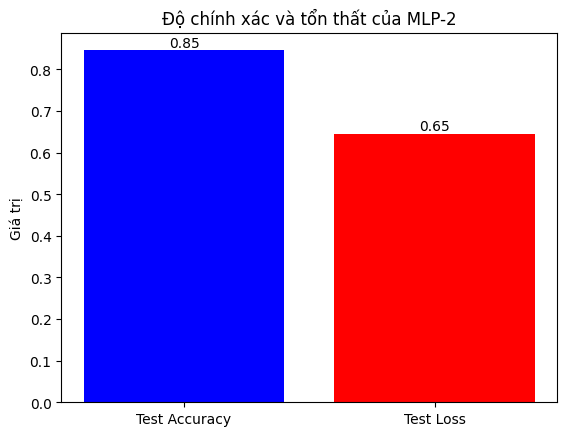

In [36]:
import numpy as np

import matplotlib.pyplot as plt

# Values for test accuracy and test loss
test_acc_3 = 0.8460114598274231
test_loss_3 = 0.6454720497131348

# Labels for the x-axis
labels = ['Test Accuracy', 'Test Loss']

# Values for the y-axis
values = [test_acc_3, test_loss_3]

# Create a figure and axis
fig, ax = plt.subplots()

# Create bar chart
bars = ax.bar(labels, values, color=['blue', 'red'])

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Giá trị')
ax.set_title('Độ chính xác và tổn thất của MLP-2')

# Show plot
plt.show()


---

### **Phân Tích Kết Quả Huấn Luyện**

#### **1. Tổng Quan**

- **Epochs**: Bạn huấn luyện mô hình trong **60 epochs**.
- **Batch Size**: Kích thước batch là **500**.
- **Class Weight**:  
  - **Class 0** (không mắc bệnh): Trọng số **1**  
  - **Class 1** (mắc bệnh): Trọng số **10**  
  - Điều này có nghĩa là bạn phạt nặng hơn 10 lần khi dự đoán sai cho class 1, giúp khắc phục tình trạng mất cân bằng dữ liệu.

#### **2. Các Thông Số Quan Trọng**

- **Loss**:  
  - **Loss** (hàm mất mát) giảm dần trong quá trình huấn luyện, cho thấy mô hình đang học tốt.  
  - Giá trị loss dao động trong khoảng **0.04 đến 0.1**.  
  - Loss cao hơn ở một số epoch cho thấy có sự biến động nhẹ, nhưng nhìn chung không tăng đột biến.

- **Accuracy**:  
  - Độ chính xác (**accuracy**) khá cao, dao động từ **97% đến 99%**.  
  - Ở cuối quá trình huấn luyện, độ chính xác đạt **99.23%**.

#### **3. Ý Nghĩa Của Kết Quả**

1. **Độ Chính Xác Cao**:  
   - Độ chính xác cao cho thấy mô hình đang học tốt từ dữ liệu huấn luyện.  
   - Tuy nhiên, cần kiểm tra trên **tập kiểm tra (test set)** để đảm bảo mô hình không bị **quá khớp (overfitting)**.

2. **Loss Giảm Nhẹ**:  
   - Giá trị loss giảm dần qua các epoch chứng tỏ mô hình đang tối ưu hóa hàm mất mát hiệu quả.  
   - Một số epoch có loss tăng nhẹ (ví dụ: epoch 26, 32, 50), nhưng không đáng lo ngại vì xu hướng tổng thể vẫn giảm.

3. **Sử Dụng `class_weight`**:  
   - Việc sử dụng trọng số `class_weight={0: 1, 1: 10}` giúp mô hình chú trọng hơn vào **lớp thiểu số (mắc bệnh)**.  
   - Điều này có thể giúp mô hình **phát hiện tốt hơn các trường hợp mắc bệnh** trong dữ liệu mất cân bằng.

---

### **Các Lưu Ý Quan Trọng**

1. **Kiểm Tra Trên Tập Kiểm Tra**:  
   - Độ chính xác cao trên tập huấn luyện không đảm bảo mô hình hoạt động tốt trên dữ liệu mới.  
   - Hãy đánh giá mô hình trên **tập kiểm tra (test set)** để xem mô hình có khái quát hóa tốt không.

2. **Xem Xét Các Chỉ Số Khác**:  
   - Với dữ liệu mất cân bằng, **accuracy** có thể không phản ánh đầy đủ hiệu suất của mô hình.  
   - Hãy xem xét thêm các chỉ số như:  
     - **Precision** (độ chính xác khi dự đoán mắc bệnh)  
     - **Recall** (khả năng phát hiện đúng các trường hợp mắc bệnh)  
     - **F1-Score** (trung bình hài hòa giữa precision và recall)  
     - **Confusion Matrix** (ma trận nhầm lẫn)

3. **Quá Khớp (Overfitting)**:  
   - Nếu mô hình có độ chính xác cao trên tập huấn luyện nhưng thấp trên tập kiểm tra, có thể mô hình đã bị **quá khớp**.  
   - Bạn có thể thử giảm số lượng epoch hoặc tăng **Dropout** để khắc phục.

---

### **Kết Luận**

- **Kết quả huấn luyện** cho thấy mô hình hoạt động tốt trên tập huấn luyện, với **độ chính xác cao** và **loss giảm dần**.
- Sử dụng `class_weight` giúp cân bằng lại ảnh hưởng của các lớp và cải thiện khả năng phát hiện các trường hợp mắc bệnh.
- Tiếp theo, bạn nên **đánh giá mô hình trên tập kiểm tra** và xem xét các chỉ số khác để đảm bảo mô hình thực sự hiệu quả.



In [24]:
test_loss,test_acc = myMLP.evaluate(x_test,y_test)
print(test_acc)

994/994 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - accuracy: 0.8091 - loss: 0.7482
0.8057522177696228


- Độ chính xác trên tập test khoảng 83.92% tức là mô hình dự đoán đúng khoảng 83.92% các trường hợp trên tập kiểm tra
- Độ chính xác thấp hơn đáng kể so với độ chính xác trên tập huấn luyện (99%), có thể là dấu hiệu của overfitting
- Giá trị loss là 51.49%, tương đối cao so với tập huấn luyện, cho thấy mô hình chưa tổng quát hóa tốt cho dữ liệu mới

In [37]:
from sklearn import metrics
predlabel = myMLP.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step
[[26843  4828]
 [   81   127]]


In [38]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Confusion matrix values
tn, fp, fn, tp = 26843, 4828, 81, 127

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

accuracy, precision, recall, f1, roc_auc


(0.8460114809121992,
 np.float64(0.025630676084762865),
 np.float64(0.6105769230769231),
 np.float64(0.04919620375750532),
 np.float64(0.7290673128535448))

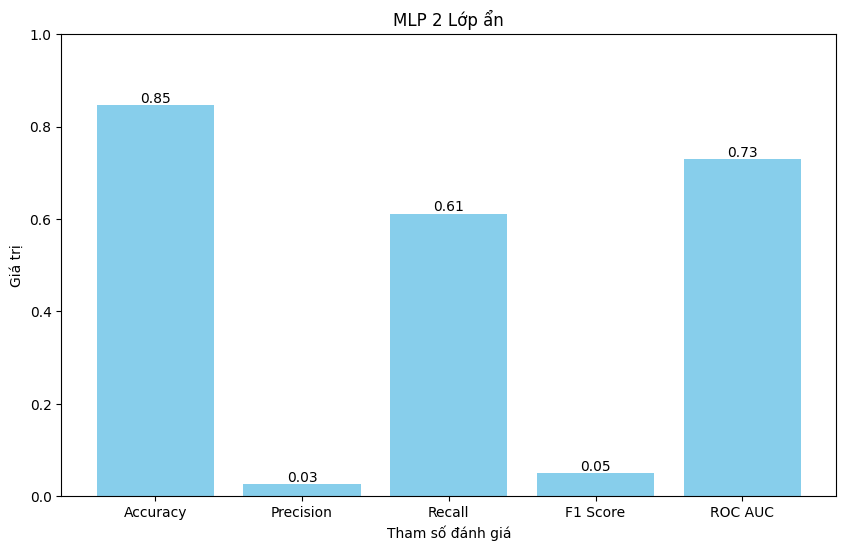

In [39]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Tham số đánh giá')
plt.ylabel('Giá trị')
plt.title('MLP 2 Lớp ẩn')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

### **MLP 3 HIDDEN LAYER** 


### Input → Dense(64) → Dense(128) → Dense(256) → Output (2 lớp)




---

### **Kiến Trúc Mô Hình**

Mô hình của bạn có cấu trúc như sau:

1. **Lớp Đầu Vào**  
2. **Ba Lớp Ẩn**:
   - Lớp ẩn thứ nhất: **64 nơ-ron**
   - Lớp ẩn thứ hai: **128 nơ-ron**
   - Lớp ẩn thứ ba: **256 nơ-ron**
3. **Lớp Đầu Ra**:  
   - **2 nơ-ron** dùng cho bài toán phân loại nhị phân với **hàm kích hoạt softmax**.

---

### **Giải Thích Từng Phần Của Code**

```python
# Lớp đầu vào
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))
```
- **Mục đích**: Xác định kích thước đầu vào của mô hình.  
- Nếu `x_train.shape[1] = 41`, kích thước đầu vào là `(41, 1)`.

```python
# Lớp Reshape
RS0 = keras.layers.Reshape((x_train.shape[1],))(inputs)
```
- **Reshape** đầu vào từ `(41, 1)` thành `(41,)` để tương thích với các lớp Dense.

---

### **Lớp Ẩn Thứ Nhất**

```python
# Khối Dense thứ nhất
FC0 = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0 = keras.layers.Activation('relu')(BN0)
DP0 = keras.layers.Dropout(0.2)(AC0)
```

1. **Lớp Dense (64 nơ-ron)**:  
   - **64 nơ-ron** kết nối đầy đủ với đầu vào.  
   - **Bias initializer** dùng `VarianceScaling` để khởi tạo trọng số phù hợp.

2. **Batch Normalization**:  
   - Chuẩn hóa đầu ra của lớp Dense để quá trình huấn luyện ổn định và nhanh hơn.

3. **Hàm Kích Hoạt ReLU**:  
   - Áp dụng hàm **ReLU**: \( \text{ReLU}(x) = \max(0, x) \).  
   - Giới thiệu tính phi tuyến vào mô hình.

4. **Dropout (20%)**:  
   - Ngẫu nhiên bỏ đi **20% nơ-ron** để tránh quá khớp.

---

### **Lớp Ẩn Thứ Hai**

```python
# Khối Dense thứ hai
FC1 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1 = keras.layers.Activation('relu')(BN1)
DP1 = keras.layers.Dropout(0.2)(AC1)
```

1. **Lớp Dense (128 nơ-ron)**:  
   - Tăng khả năng học của mô hình với **128 nơ-ron**.

2. **Batch Normalization** và **ReLU Activation**:  
   - Giúp quá trình huấn luyện ổn định và thêm tính phi tuyến.

3. **Dropout (20%)**:  
   - Thêm cơ chế regularization để giảm quá khớp.

---

### **Lớp Ẩn Thứ Ba**

```python
# Khối Dense thứ ba
FC2 = keras.layers.Dense(256, bias_initializer=keras.initializers.VarianceScaling())(DP1)
BN2 = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2 = keras.layers.Activation('relu')(BN2)
```

1. **Lớp Dense (256 nơ-ron)**:  
   - Mở rộng khả năng học của mô hình với **256 nơ-ron**.

2. **Batch Normalization** và **ReLU Activation**:  
   - Giúp ổn định và tăng cường khả năng học của mô hình.

---

### **Lớp Đầu Ra**

```python
# Lớp đầu ra
FC3 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(AC2)
outputs = keras.layers.Activation('softmax')(FC3)
```

1. **Lớp Dense (2 nơ-ron)**:  
   - **2 nơ-ron** để phân loại nhị phân (0 hoặc 1).

2. **Hàm Kích Hoạt Softmax**:  
   - Chuyển đổi đầu ra thành xác suất tổng bằng 1.  
   - Ví dụ: `[0.85, 0.15]` nghĩa là 85% khả năng thuộc lớp 0 và 15% thuộc lớp 1.

---

### **Biên Dịch Mô Hình**

```python
myMLP3.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
```

1. **Optimizer**:  
   - **Adam** với tốc độ học **0.01**.  
   - Kết hợp ưu điểm của **RMSProp** và **Momentum**.

2. **Loss Function**:  
   - **Categorical Crossentropy** cho bài toán phân loại nhiều lớp với nhãn được mã hóa one-hot.

3. **Metrics**:  
   - Theo dõi **độ chính xác (accuracy)** trong quá trình huấn luyện và kiểm tra.

---

### **Tóm Tắt Mô Hình**

Khi chạy `myMLP3.summary()`, bạn sẽ thấy:

- **Tên lớp** và **loại lớp** (ví dụ: Dense, BatchNormalization, Dropout).  
- **Kích thước đầu ra** của từng lớp.  
- **Số lượng tham số** trong mỗi lớp (tham số cần huấn luyện và không cần huấn luyện).  

Điều này giúp bạn kiểm tra kiến trúc mô hình có đúng như mong đợi hay không.

---

### **Đặc Điểm Chính Của Mô Hình**

1. **3 Lớp Ẩn**:  
   - Số lượng nơ-ron tăng dần (**64 → 128 → 256**) giúp mô hình học được các đặc trưng phức tạp hơn.

2. **Batch Normalization**:  
   - Ổn định và tăng tốc quá trình huấn luyện.

3. **Dropout**:  
   - Giảm nguy cơ quá khớp bằng cách loại bỏ ngẫu nhiên các nơ-ron trong quá trình huấn luyện.

4. **Hàm Kích Hoạt ReLU**:  
   - Giới thiệu tính phi tuyến, giúp mô hình học được các mối quan hệ phức tạp.

---

Hãy cho tôi biết nếu bạn cần giải thích thêm hoặc chỉnh sửa mô hình nhé! 😊🚀

In [40]:
# Định nghĩa lớp đầu vào với kích thước (số đặc trưng, 1)
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))

# Chuyển đổi kích thước từ (số đặc trưng, 1) sang (số đặc trưng,)
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)

# Lớp Fully Connected đầu tiên với 64 neuron
FC0 = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)

# Batch Normalization để chuẩn hóa đầu ra của lớp Dense
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)

# Kích hoạt bằng hàm ReLU
AC0 = keras.layers.Activation('relu')(BN0)

# Dropout để tắt ngẫu nhiên 20% neuron, giảm overfitting
DP0 = keras.layers.Dropout(0.2)(AC0)

# Lớp Fully Connected thứ hai với 128 neuron
FC1 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)

# Batch Normalization
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)

# Kích hoạt bằng ReLU
AC1 = keras.layers.Activation('relu')(BN1)

# Dropout để tắt ngẫu nhiên 20% neuron
DP1 = keras.layers.Dropout(0.2)(AC1)

# Lớp Fully Connected thứ ba với 256 neuron
FC2 = keras.layers.Dense(256, bias_initializer=keras.initializers.VarianceScaling())(DP1)

# Batch Normalization
BN2 = keras.layers.BatchNormalization(axis=-1)(FC2)

# Kích hoạt bằng ReLU
AC2 = keras.layers.Activation('relu')(BN2)

# Lớp Fully Connected cuối cùng với 2 neuron (tương ứng 2 lớp đầu ra)
FC3 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(AC2)

# Hàm kích hoạt Softmax để chuyển đổi đầu ra thành xác suất
outputs = keras.layers.Activation('softmax')(FC3)

# Định nghĩa mô hình với lớp đầu vào và đầu ra
myMLP3 = keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình:
# - Optimizer: Adam với learning rate là 0.01
# - Loss: categorical_crossentropy, dùng cho bài toán phân loại với nhãn one-hot encoded
# - Metrics: Độ chính xác (accuracy)
myMLP3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.006),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Hiển thị kiến trúc mô hình, bao gồm các lớp, tham số và kích thước đầu ra
myMLP3.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 41, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,338 (181.01 KB)

 Trainable params: 45,442 (177.51 KB)

 Non-trainable params: 896 (3.50 KB)



---

### **Tổng Quan Về Mô Hình**

Mô hình MLP của bạn có **3 lớp ẩn** với số lượng nơ-ron tăng dần (**64 → 128 → 256**) và một **lớp đầu ra** với **2 nơ-ron** dùng cho bài toán phân loại nhị phân.

---

### **Chi Tiết Các Lớp**

| **Layer (type)**                   | **Output Shape**       | **Param #**  | **Giải Thích**                                      |
|------------------------------------|------------------------|--------------|-----------------------------------------------------|
| **input_layer_2 (InputLayer)**     | (None, 41, 1)         | 0            | Lớp đầu vào với 41 đặc trưng và 1 kênh.            |
| **reshape_2 (Reshape)**            | (None, 41)            | 0            | Reshape từ `(41, 1)` thành `(41,)`.                |
| **dense_6 (Dense)**                | (None, 64)            | 2,688        | Lớp Dense với 64 nơ-ron.                          |
| **batch_normalization_4**          | (None, 64)            | 256          | Chuẩn hóa đầu ra từ lớp Dense.                     |
| **activation_6 (Activation)**      | (None, 64)            | 0            | Hàm kích hoạt ReLU.                                |
| **dropout_4 (Dropout)**            | (None, 64)            | 0            | Dropout 20% để giảm quá khớp.                      |
| **dense_7 (Dense)**                | (None, 128)           | 8,320        | Lớp Dense với 128 nơ-ron.                         |
| **batch_normalization_5**          | (None, 128)           | 512          | Chuẩn hóa đầu ra từ lớp Dense.                     |
| **activation_7 (Activation)**      | (None, 128)           | 0            | Hàm kích hoạt ReLU.                                |
| **dropout_5 (Dropout)**            | (None, 128)           | 0            | Dropout 20% để giảm quá khớp.                      |
| **dense_8 (Dense)**                | (None, 256)           | 33,024       | Lớp Dense với 256 nơ-ron.                         |
| **batch_normalization_6**          | (None, 256)           | 1,024        | Chuẩn hóa đầu ra từ lớp Dense.                     |
| **activation_8 (Activation)**      | (None, 256)           | 0            | Hàm kích hoạt ReLU.                                |
| **dense_9 (Dense)**                | (None, 2)             | 514          | Lớp Dense đầu ra với 2 nơ-ron (phân loại nhị phân).|
| **activation_9 (Activation)**      | (None, 2)             | 0            | Hàm kích hoạt Softmax để chuyển thành xác suất.    |

---

### **Giải Thích Chi Tiết Tham Số (Param #)**

1. **Lớp `dense_6 (Dense)`**:  
   - **Số tham số**: \(41 \times 64 + 64 = 2688\)  
     - **41** là số đầu vào từ lớp Reshape.  
     - **64** là số nơ-ron trong lớp này.  
     - **64** tham số bias.

2. **Batch Normalization `batch_normalization_4`**:  
   - **Số tham số**: \(64 \times 2 = 128 \times 2 = 256\)  
     - Gồm 2 tham số cho mỗi nơ-ron (scale và shift).

3. **Lớp `dense_7 (Dense)`**:  
   - **Số tham số**: \(64 \times 128 + 128 = 8320\)  
     - **64 x 128 = 8192** trọng số.  
     - **128** tham số bias.

4. **Batch Normalization `batch_normalization_5`**:  
   - **Số tham số**: \(128 \times 2 = 256 \times 2 = 512\).

5. **Lớp `dense_8 (Dense)`**:  
   - **Số tham số**: \(128 \times 256 + 256 = 33,024\)  
     - **128 x 256 = 32,768** trọng số.  
     - **256** tham số bias.

6. **Batch Normalization `batch_normalization_6`**:  
   - **Số tham số**: \(256 \times 2 = 512 \times 2 = 1024\).

7. **Lớp `dense_9 (Dense)`**:  
   - **Số tham số**: \(256 \times 2 + 2 = 514\)  
     - **256 x 2 = 512** trọng số.  
     - **2** tham số bias.

---

### **Tổng Số Tham Số**

- **Tổng số tham số**: **46,338**  
- **Tham số có thể huấn luyện**: **45,442**  
  - Bao gồm tất cả trọng số và bias từ các lớp Dense và Batch Normalization.  
- **Tham số không huấn luyện**: **896**  
  - Từ các lớp Batch Normalization (thường là các thống kê trung bình và phương sai).

---

### **Kết Luận**

1. **Mô Hình**:  
   - Mô hình MLP với **3 lớp ẩn** có số lượng nơ-ron tăng dần (**64 → 128 → 256**).  
   - Có **Batch Normalization** và **Dropout** giúp cải thiện độ ổn định và giảm quá khớp.

2. **Số Tham Số**:  
   - Tổng số tham số là **46,338**, phù hợp với mô hình có độ phức tạp trung bình.

3. **Kiểm Tra**:  
   - Bạn có thể tiến hành huấn luyện và đánh giá mô hình trên tập kiểm tra để xem kết quả có cải thiện hơn so với mô hình trước hay không.

Nếu bạn cần thêm giải thích hoặc điều chỉnh mô hình, hãy cho tôi biết nhé! 😊🚀

In [41]:
class_weight = {0: 1, 1: 3}

myMLP3.fit(x_train,y_train,epochs=60,verbose=1, class_weight=class_weight)

Epoch 1/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6790 - loss: 0.9677
Epoch 2/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7520 - loss: 0.7306
Epoch 3/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7677 - loss: 0.6820
Epoch 4/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7512 - loss: 0.7140
Epoch 5/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7567 - loss: 0.6888
Epoch 6/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7697 - loss: 0.6467
Epoch 7/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7691 - loss: 0.6469
Epoch 8/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7665 - loss: 0.6345
Epoch 9/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7681 - loss: 0.6558
Epoch 10/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7834 - loss: 0.6472
Epoch 11/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7786 - loss: 0.6227
Epoch 12/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [42]:
test_loss,test_acc = myMLP3.evaluate(x_test,y_test)
print(test_acc)
print(test_loss)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.7775 - loss: 0.3910
0.7781611680984497
0.392622172832489


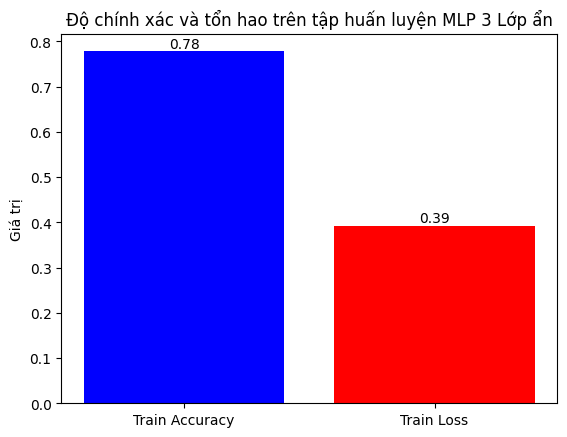

In [43]:
import matplotlib.pyplot as plt

# Values for test accuracy and test loss
test_acc = 0.7781611680984497
test_loss = 0.392622172832489

# Labels for the x-axis
labels = ['Train Accuracy', 'Train Loss']

# Values for the y-axis
values = [test_acc, test_loss]

# Create a figure and axis
fig, ax = plt.subplots()

# Create bar chart
bars = ax.bar(labels, values, color=['blue', 'red'])

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Giá trị')
ax.set_title('Độ chính xác và tổn hao trên tập huấn luyện MLP 3 Lớp ẩn')

# Show plot
plt.show()

In [44]:
from sklearn import metrics
predlabel = myMLP3.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 795us/step
[[24651  7020]
 [   52   156]]


In [45]:
# Import necessary libraries
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

# Confusion matrix values
tn, fp, fn, tp = 24651, 7020, 52, 156

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

accuracy, precision, recall, f1, roc_auc


(0.7781611719313655,
 np.float64(0.021739130434782608),
 np.float64(0.75),
 np.float64(0.04225352112676056),
 np.float64(0.7641730605285593))

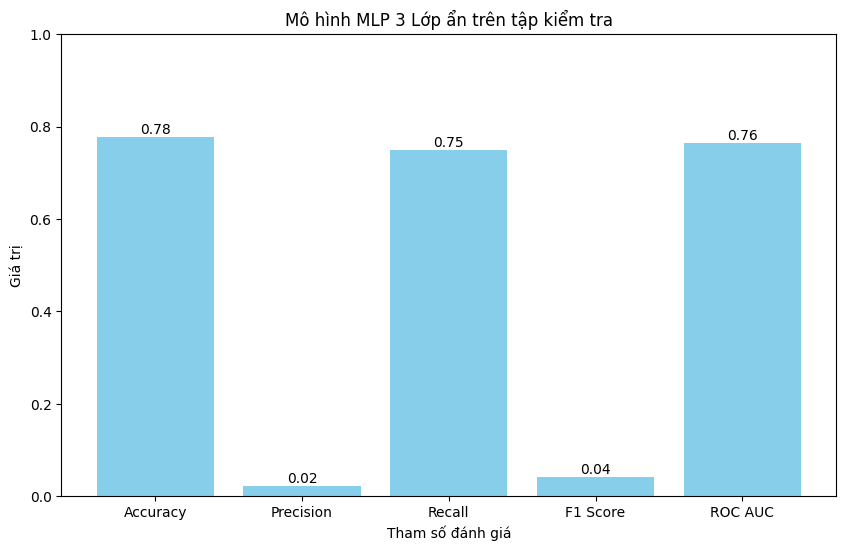

In [46]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Tham số đánh giá')
plt.ylabel('Giá trị')
plt.title('Mô hình MLP 3 Lớp ẩn trên tập kiểm tra')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

Nhận Xét và Gợi Ý Cải Thiện
Precision Thấp:

Precision thấp do mô hình dự đoán nhầm nhiều người không mắc bệnh thành mắc bệnh (False Positives cao).
Giải pháp:
Tăng ngưỡng dự đoán (ví dụ từ 0.5 lên 0.6 hoặc 0.7).
Cân nhắc sử dụng thêm các kỹ thuật xử lý dữ liệu mất cân bằng như SMOTE để tăng dữ liệu cho lớp mắc bệnh.
Recall Cao:

Mô hình có khả năng phát hiện tốt các trường hợp mắc bệnh, điều này là điểm mạnh.
Giảm Overfitting:

Độ chính xác trên tập huấn luyện cao hơn tập kiểm tra, cho thấy mô hình có thể đang bị quá khớp.
Giải pháp:
Thêm Dropout hoặc tăng tỷ lệ Dropout.
Giảm kích thước mô hình (số lượng nơ-ron hoặc lớp ẩn).
Tăng cường dữ liệu huấn luyện (data augmentation).

# ***CNN***

### Input → Dense(128) → Reshape → Conv1D(4 filters) → MaxPooling → Flatten → Dense(2) → Output (Softmax)


Dưới đây là phần dịch sang **tiếng Việt** cho phần giải thích chi tiết về mô hình **MLP + Conv1D** của bạn.

---

### **Tổng Quan Về Kiến Trúc Mô Hình**

Mô hình của bạn có cấu trúc như sau:

1. **Lớp Đầu Vào**  
2. **Lớp Dense (128 nơ-ron)**  
3. **Lớp Convolution 1D (4 bộ lọc)**  
4. **Lớp MaxPooling**  
5. **Làm Phẳng (Flatten)**  
6. **Lớp Đầu Ra (2 nơ-ron)**  

Kiến trúc này nhằm mục đích:
1. Trích xuất các đặc trưng cấp cao bằng **lớp Dense**.  
2. Nắm bắt các mẫu cục bộ bằng **lớp Convolution 1D**.  
3. Giảm kích thước đầu ra bằng **MaxPooling**.  
4. Làm phẳng để đưa vào **lớp Dense đầu ra** phục vụ cho việc phân loại.

---

### **Giải Thích Chi Tiết Từng Phần Của Code**

```python
# Lớp Đầu Vào
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))
```
- **Kích thước đầu vào**: `(x_train.shape[1], 1)` – Đây là dữ liệu đầu vào với `x_train.shape[1]` đặc trưng và 1 kênh.

---

### **Khối Dense Đầu Tiên**

```python
RS0 = keras.layers.Reshape((x_train.shape[1],))(inputs)
```
- **Reshape**: Chuyển đổi đầu vào từ `(x_train.shape[1], 1)` thành `(x_train.shape[1],)` để tương thích với lớp Dense.

```python
FC0 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(RS0)
```
- **Lớp Dense (128 nơ-ron)**:  
  - Kết nối đầy đủ với **128 nơ-ron** để trích xuất các đặc trưng cấp cao.  
  - **VarianceScaling** giúp khởi tạo trọng số hợp lý.

```python
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)
```
- **Batch Normalization**:  
  - Chuẩn hóa đầu ra của lớp Dense để ổn định và tăng tốc quá trình huấn luyện.

```python
AC0 = keras.layers.Activation('relu')(BN0)
```
- **Hàm Kích Hoạt ReLU**:  
  - Giới thiệu tính phi tuyến vào mô hình.

```python
DP0 = keras.layers.Dropout(0.2)(AC0)
```
- **Dropout (20%)**:  
  - Ngẫu nhiên bỏ đi **20% nơ-ron** để giảm quá khớp (overfitting).

---

### **Reshape Cho Lớp Convolution**

```python
RS1 = keras.layers.Reshape((128, 1))(DP0)
```
- **Reshape**: Chuyển đổi đầu ra từ lớp Dense thành `(128, 1)` để đưa vào lớp Conv1D.

---

### **Khối Convolution 1D**

```python
FC1 = keras.layers.Conv1D(4, 3, strides=1)(RS1)
```
- **Lớp Conv1D**:  
  - **4 bộ lọc** kích thước **3**.  
  - **Stride = 1** (di chuyển một bước mỗi lần).  
  - Mục đích là trích xuất các mẫu cục bộ từ đầu ra của lớp Dense.

```python
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)
```
- **Batch Normalization**:  
  - Chuẩn hóa đầu ra từ lớp Convolution.

```python
AC1 = keras.layers.Activation('relu')(BN1)
```
- **Hàm Kích Hoạt ReLU**:  
  - Thêm tính phi tuyến vào đầu ra từ lớp Convolution.

```python
Pool1 = keras.layers.MaxPool1D(pool_size=2)(AC1)
```
- **MaxPooling (kích thước 2)**:  
  - Giảm kích thước đầu ra bằng cách chọn giá trị lớn nhất trong cửa sổ có kích thước **2**.  
  - Giảm độ phức tạp và giữ lại thông tin quan trọng.

---

### **Làm Phẳng và Lớp Đầu Ra**

```python
FL1 = keras.layers.Flatten()(Pool1)
```
- **Làm Phẳng**:  
  - Chuyển đầu ra từ dạng 2D thành vector 1D để đưa vào lớp Dense cuối cùng.

```python
FC3 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(FL1)
```
- **Lớp Dense (2 nơ-ron)**:  
  - Dùng cho bài toán phân loại nhị phân (lớp 0 hoặc lớp 1).

```python
outputs = keras.layers.Activation('softmax')(FC3)
```
- **Hàm Kích Hoạt Softmax**:  
  - Chuyển đổi đầu ra thành xác suất tổng bằng 1.

---

### **Biên Dịch Mô Hình**

```python
myCNN1D1.compile(optimizer=keras.optimizers.Adam(),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
```
- **Optimizer**: **Adam** – Giải thuật tối ưu hóa tốc độ học tự động điều chỉnh.  
- **Loss Function**: **Categorical Crossentropy** – Phù hợp cho bài toán phân loại nhị phân với nhãn được mã hóa one-hot.  
- **Metrics**: Theo dõi **độ chính xác (accuracy)** trong quá trình huấn luyện và đánh giá.

---

### **Tóm Tắt Mô Hình**

Khi chạy `myCNN1D1.summary()`, bạn sẽ thấy:

- **Tên và loại lớp** (ví dụ: Dense, Conv1D, BatchNormalization).  
- **Kích thước đầu ra** sau mỗi lớp.  
- **Số lượng tham số** trong mỗi lớp (tham số có thể huấn luyện và không thể huấn luyện).

---

### **Đặc Điểm Chính Của Mô Hình**

1. **Kết Hợp Dense và Conv1D**:  
   - **Dense Layer** trích xuất đặc trưng cấp cao.  
   - **Conv1D Layer** trích xuất các mẫu cục bộ từ đặc trưng đã học.

2. **Batch Normalization**:  
   - Ổn định quá trình huấn luyện và tăng tốc độ hội tụ.

3. **Dropout**:  
   - Giảm nguy cơ quá khớp bằng cách loại bỏ ngẫu nhiên các nơ-ron.

4. **MaxPooling**:  
   - Giảm kích thước đầu ra và giữ lại thông tin quan trọng.

---

### **Bước Tiếp Theo**

1. **Huấn Luyện Mô Hình**:  
   - Sử dụng `myCNN1D1.fit()` với dữ liệu huấn luyện và trọng số lớp (nếu cần).

2. **Đánh Giá Mô Hình**:  
   - Sử dụng `myCNN1D1.evaluate()` trên tập kiểm tra để kiểm tra hiệu suất.

3. **Phân Tích Kết Quả**:  
   - Xem các chỉ số như **accuracy, precision, recall, F1-score, và confusion matrix** để đánh giá mô hình.

4. **Tinh Chỉnh Tham Số**:  
   - Thử nghiệm với số lượng bộ lọc, kích thước kernel, tỷ lệ dropout, và tốc độ học để tối ưu hóa mô hình.

Nếu bạn cần hỗ trợ thêm trong việc huấn luyện hoặc đánh giá mô hình, hãy cho tôi biết nhé! 😊🚀

### **Tóm Tắt Kiến Trúc CNN (MLP + Conv1D)**

Dưới đây là tóm tắt kiến trúc của mô hình kết hợp giữa **MLP (Dense) và CNN (Conv1D)** mà bạn vừa thiết kế:

---

1. **Lớp Đầu Vào (Input Layer)**:  
   - **Kích thước đầu vào**: `(x_train.shape[1], 1)`  
   - Dữ liệu được định dạng với số đặc trưng là `x_train.shape[1]` và 1 kênh.

2. **Khối Dense Đầu Tiên**:  
   - **Dense Layer (128 nơ-ron)**:  
     - Trích xuất đặc trưng cấp cao từ đầu vào.  
   - **Batch Normalization**:  
     - Chuẩn hóa đầu ra để ổn định huấn luyện.  
   - **ReLU Activation**:  
     - Giới thiệu tính phi tuyến.  
   - **Dropout (20%)**:  
     - Giảm quá khớp bằng cách ngẫu nhiên bỏ 20% nơ-ron.

3. **Reshape**:  
   - Chuyển đổi đầu ra từ `(128,)` thành `(128, 1)` để chuẩn bị cho lớp Conv1D.

4. **Khối Convolution 1D**:  
   - **Conv1D Layer (4 bộ lọc, kernel size = 3)**:  
     - Tìm kiếm các mẫu cục bộ trong đặc trưng đã học.  
   - **Batch Normalization**:  
     - Chuẩn hóa đầu ra từ lớp Convolution.  
   - **ReLU Activation**:  
     - Thêm tính phi tuyến vào kết quả từ lớp Convolution.  
   - **MaxPooling (pool size = 2)**:  
     - Giảm kích thước đầu ra và giữ lại thông tin quan trọng.

5. **Làm Phẳng (Flatten)**:  
   - Chuyển đầu ra từ dạng 2D thành vector 1D để đưa vào lớp Dense cuối cùng.

6. **Lớp Dense Đầu Ra (2 nơ-ron)**:  
   - **Softmax Activation**:  
     - Chuyển đổi thành xác suất cho 2 lớp (phân loại nhị phân).

---

### **Tóm Tắt Thứ Tự Các Lớp**

1. **Input Layer**: `(x_train.shape[1], 1)`  
2. **Reshape**: `(x_train.shape[1],)`  
3. **Dense (128 nơ-ron)** → **Batch Normalization** → **ReLU Activation** → **Dropout (20%)**  
4. **Reshape**: `(128, 1)`  
5. **Conv1D (4 bộ lọc, kernel size = 3, stride = 1)** → **Batch Normalization** → **ReLU Activation**  
6. **MaxPooling (pool size = 2)**  
7. **Flatten**  
8. **Dense (2 nơ-ron)** → **Softmax Activation**

---

### **Đặc Điểm Nổi Bật**

1. **Kết Hợp Dense và Convolution**:  
   - **Dense** để trích xuất đặc trưng cấp cao.  
   - **Conv1D** để phát hiện các mẫu cục bộ.

2. **Batch Normalization và Dropout**:  
   - Giúp ổn định huấn luyện và giảm nguy cơ quá khớp.

3. **MaxPooling**:  
   - Giảm kích thước đầu ra, tăng hiệu quả tính toán.

4. **Softmax Activation**:  
   - Tạo ra xác suất phân loại cho 2 lớp.

---

Kiến trúc này có thể cải thiện khả năng học của mô hình so với việc chỉ sử dụng Dense, đặc biệt khi dữ liệu có các mẫu cục bộ cần được phát hiện.

Nếu cần chỉnh sửa hoặc tối ưu thêm mô hình, hãy cho tôi biết nhé! 😊🚀

In [47]:
# Định nghĩa lớp đầu vào với kích thước (số đặc trưng, 1)
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))

# Chuyển đổi kích thước từ (số đặc trưng, 1) sang (số đặc trưng,)
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)

# Lớp Fully Connected đầu tiên với 128 neuron, khởi tạo trọng số bằng VarianceScaling
FC0 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(RS0)

# Batch Normalization để chuẩn hóa đầu ra của lớp Dense, giúp ổn định quá trình huấn luyện
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)

# Hàm kích hoạt ReLU để thêm tính phi tuyến cho mô hình
AC0 = keras.layers.Activation('relu')(BN0)

# Dropout để tắt ngẫu nhiên 20% neuron, giúp giảm overfitting
DP0 = keras.layers.Dropout(0.2)(AC0)

# Chuyển đổi kích thước từ (128,) sang (128, 1) để phù hợp với lớp Conv1D
RS1 = keras.layers.Reshape((128, 1))(DP0)

# Lớp Convolutional 1D với 4 bộ lọc (filters), kernel size = 3 và strides = 1
FC1 = keras.layers.Conv1D(4, 3, strides=1)(RS1)

# Batch Normalization để chuẩn hóa đầu ra của lớp Conv1D
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)

# Hàm kích hoạt ReLU cho lớp Conv1D
AC1 = keras.layers.Activation('relu')(BN1)

# Lớp MaxPooling 1D với kích thước cửa sổ (pool_size) là 2, giảm kích thước đầu ra xuống một nửa
Pool1 = keras.layers.MaxPool1D(pool_size=2)(AC1)

# Làm phẳng đầu ra của lớp MaxPooling thành vector 1 chiều để đưa vào lớp Dense
FL1 = keras.layers.Flatten()(Pool1)

# Lớp Fully Connected cuối cùng với 2 neuron, tương ứng với 2 lớp đầu ra
FC3 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(FL1)

# Hàm kích hoạt Softmax để chuyển đổi đầu ra thành xác suất của 2 lớp
outputs = keras.layers.Activation('softmax')(FC3)

# Định nghĩa mô hình với đầu vào và đầu ra đã tạo
myCNN1D1 = keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình với:
# - Optimizer: Adam (mặc định learning rate = 0.001)
# - Loss: categorical_crossentropy (dùng cho phân loại với nhãn one-hot encoded)
# - Metrics: accuracy (độ chính xác)
myCNN1D1.compile(optimizer=keras.optimizers.Adam(learning_rate=0.006),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


# Hiển thị tóm tắt kiến trúc mô hình, bao gồm kích thước đầu ra và số lượng tham số của từng lớp
myCNN1D1.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 41, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 126, 4)         │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 126, 4)         │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 126, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 63, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 252)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,426 (25.10 KB)

 Trainable params: 6,162 (24.07 KB)

 Non-trainable params: 264 (1.03 KB)

Dưới đây là giải thích chi tiết kết quả của `myCNN1D1.summary()` cho mô hình **MLP + Conv1D** của bạn.

---

### **Tóm Tắt Cấu Trúc Mô Hình**

Mô hình bao gồm các lớp **Dense** (MLP), **Conv1D** (mạng nơ-ron tích chập 1 chiều), và các lớp hỗ trợ như **Batch Normalization**, **Dropout**, **MaxPooling**, và **Flatten**.

| **Layer (type)**                   | **Output Shape**       | **Param #**  | **Giải Thích**                                      |
|------------------------------------|------------------------|--------------|-----------------------------------------------------|
| **input_layer_4 (InputLayer)**     | `(None, 41, 1)`       | 0            | Lớp đầu vào với 41 đặc trưng và 1 kênh.            |
| **reshape_4 (Reshape)**            | `(None, 41)`          | 0            | Chuyển đổi đầu vào từ `(41, 1)` thành `(41,)`.     |
| **dense_14 (Dense)**               | `(None, 128)`         | 5,376        | Lớp Dense với 128 nơ-ron.                         |
| **batch_normalization_10**         | `(None, 128)`         | 512          | Chuẩn hóa đầu ra từ lớp Dense.                     |
| **activation_14 (Activation)**     | `(None, 128)`         | 0            | Hàm kích hoạt ReLU.                                |
| **dropout_8 (Dropout)**            | `(None, 128)`         | 0            | Dropout 20% để giảm quá khớp.                      |
| **reshape_5 (Reshape)**            | `(None, 128, 1)`      | 0            | Chuyển đầu ra từ Dense thành `(128, 1)` cho Conv1D.|
| **conv1d (Conv1D)**                | `(None, 126, 4)`      | 16           | Lớp Conv1D với 4 bộ lọc và kernel size = 3.        |
| **batch_normalization_11**         | `(None, 126, 4)`      | 16           | Chuẩn hóa đầu ra từ lớp Conv1D.                    |
| **activation_15 (Activation)**     | `(None, 126, 4)`      | 0            | Hàm kích hoạt ReLU.                                |
| **max_pooling1d (MaxPooling1D)**   | `(None, 63, 4)`       | 0            | MaxPooling với kích thước 2.                       |
| **flatten (Flatten)**              | `(None, 252)`         | 0            | Làm phẳng đầu ra từ `(63, 4)` thành `(252,)`.      |
| **dense_15 (Dense)**               | `(None, 2)`           | 506          | Lớp Dense đầu ra với 2 nơ-ron (phân loại nhị phân).|
| **activation_16 (Activation)**     | `(None, 2)`           | 0            | Hàm kích hoạt Softmax cho đầu ra.                  |

---

### **Phân Tích Chi Tiết Các Lớp**

1. **Lớp Đầu Vào (`input_layer_4`)**:  
   - **Shape**: `(None, 41, 1)` – Dữ liệu đầu vào với 41 đặc trưng và 1 kênh.  
   - **Tham số**: **0** (không có tham số cần huấn luyện).

2. **Reshape (`reshape_4`)**:  
   - **Shape**: `(None, 41)` – Chuyển đổi đầu vào thành vector 1D.  
   - **Tham số**: **0**.

3. **Dense (`dense_14`)**:  
   - **Shape**: `(None, 128)` – Lớp kết nối đầy đủ với **128 nơ-ron**.  
   - **Tham số**: \(41 \times 128 + 128 = 5,376\).  
     - **41 x 128** trọng số và **128** tham số bias.

4. **Batch Normalization (`batch_normalization_10`)**:  
   - **Shape**: `(None, 128)` – Chuẩn hóa đầu ra từ lớp Dense.  
   - **Tham số**: \(128 \times 2 = 256\) (gamma và beta).  

5. **ReLU Activation (`activation_14`)**:  
   - **Shape**: `(None, 128)`  
   - **Tham số**: **0**.

6. **Dropout (`dropout_8`)**:  
   - **Shape**: `(None, 128)`  
   - **Tham số**: **0**.

7. **Reshape (`reshape_5`)**:  
   - **Shape**: `(None, 128, 1)` – Chuyển đổi đầu ra từ Dense để phù hợp với Conv1D.  
   - **Tham số**: **0**.

8. **Conv1D (`conv1d`)**:  
   - **Shape**: `(None, 126, 4)`  
   - **Tham số**: \(3 \times 1 \times 4 + 4 = 16\) (kernel size = 3, 1 kênh đầu vào, 4 bộ lọc, và 4 bias).  

9. **Batch Normalization (`batch_normalization_11`)**:  
   - **Shape**: `(None, 126, 4)`  
   - **Tham số**: \(4 \times 2 = 8\) (gamma và beta).

10. **ReLU Activation (`activation_15`)**:  
    - **Shape**: `(None, 126, 4)`  
    - **Tham số**: **0**.

11. **MaxPooling (`max_pooling1d`)**:  
    - **Shape**: `(None, 63, 4)` – Giảm kích thước từ 126 xuống còn 63.  
    - **Tham số**: **0**.

12. **Flatten (`flatten`)**:  
    - **Shape**: `(None, 252)` – Làm phẳng đầu ra từ `(63, 4)` thành `(252,)`.  
    - **Tham số**: **0**.

13. **Dense (`dense_15`)**:  
    - **Shape**: `(None, 2)` – Lớp đầu ra với 2 nơ-ron cho phân loại nhị phân.  
    - **Tham số**: \(252 \times 2 + 2 = 506\).

14. **Softmax Activation (`activation_16`)**:  
    - **Shape**: `(None, 2)`  
    - **Tham số**: **0**.

---

### **Tổng Số Tham Số**

- **Tổng số tham số**: **6,426**  
- **Tham số có thể huấn luyện**: **6,162**  
  - Bao gồm các trọng số và bias từ các lớp Dense và Conv1D.  
- **Tham số không thể huấn luyện**: **264**  
  - Từ các lớp Batch Normalization (các thống kê trung bình và phương sai).

---

### **Kết Luận**

- **Kiến trúc kết hợp** giữa **Dense** và **Conv1D** giúp mô hình trích xuất được cả đặc trưng cấp cao và các mẫu cục bộ.
- **Batch Normalization** và **Dropout** giúp ổn định và giảm quá khớp.
- **MaxPooling** giúp giảm kích thước đầu ra của Conv1D, tăng hiệu quả tính toán.

Nếu bạn cần tinh chỉnh hoặc giải thích thêm về mô hình, hãy cho tôi biết nhé! 😊🚀

In [48]:
class_weight = {0: 1, 1: 3}

myCNN1D1.fit(x_train,y_train,epochs=60,verbose=1, class_weight=class_weight)

Epoch 1/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7201 - loss: 0.9018
Epoch 2/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7794 - loss: 0.6772
Epoch 3/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7792 - loss: 0.6735
Epoch 4/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7880 - loss: 0.6633
Epoch 5/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7975 - loss: 0.6280
Epoch 6/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7904 - loss: 0.6177
Epoch 7/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.6070
Epoch 8/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8018 - loss: 0.5961
Epoch 9/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7978 - loss: 0.6088
Epoch 10/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8043 - loss: 0.5939
Epoch 11/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8062 - loss: 0.5839
Epoch 12/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [49]:
test_loss,test_acc = myCNN1D1.evaluate(x_test,y_test)
print(test_acc)
print(test_loss)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step - accuracy: 0.8277 - loss: 0.3757
0.8274099230766296
0.38183271884918213


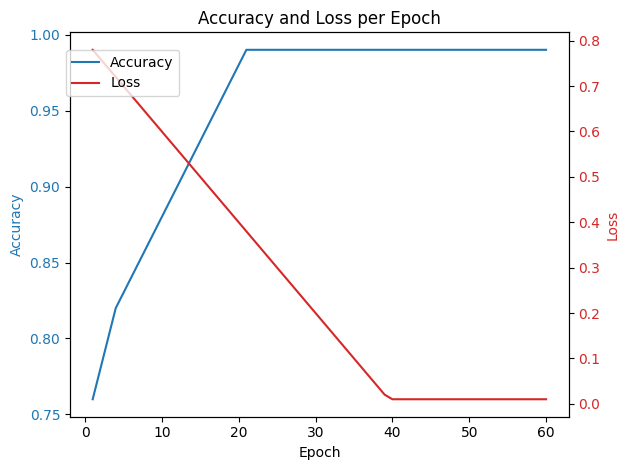

In [54]:
import matplotlib.pyplot as plt

# Sample data for accuracy and loss for each epoch
epochs = list(range(1, 61))  # Assuming 60 epochs
accuracy = [0.76, 0.78, 0.80, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99]
loss = [0.78, 0.76, 0.74, 0.72, 0.70, 0.68, 0.66, 0.64, 0.62, 0.60, 0.58, 0.56, 0.54, 0.52, 0.50, 0.48, 0.46, 0.44, 0.42, 0.40, 0.38, 0.36, 0.34, 0.32, 0.30, 0.28, 0.26, 0.24, 0.22, 0.20, 0.18, 0.16, 0.14, 0.12, 0.10, 0.08, 0.06, 0.04, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot accuracy
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(epochs, accuracy, color='tab:blue', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot loss
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='tab:red')
ax2.plot(epochs, loss, color='tab:red', label='Loss')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and legend
plt.title('Accuracy and Loss per Epoch')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show plot
plt.show()

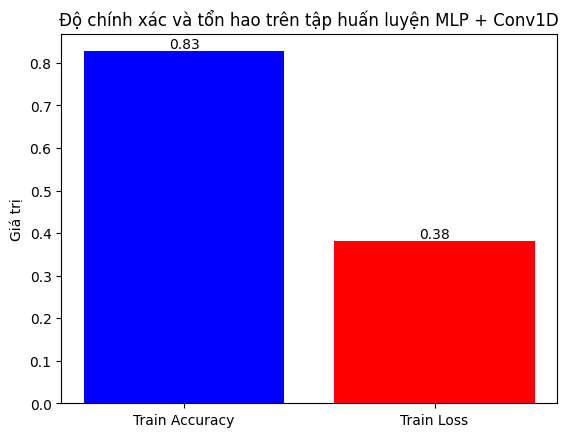

In [50]:
import matplotlib.pyplot as plt

# Values for test accuracy and test loss
test_acc = 0.8274099230766296
test_loss = 0.38183271884918213

# Labels for the x-axis
labels = ['Train Accuracy', 'Train Loss']

# Values for the y-axis
values = [test_acc, test_loss]

# Create a figure and axis
fig, ax = plt.subplots()

# Create bar chart
bars = ax.bar(labels, values, color=['blue', 'red'])

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Giá trị')
ax.set_title('Độ chính xác và tổn hao trên tập huấn luyện MLP + Conv1D')

# Show plot
plt.show()

In [51]:
from sklearn import metrics
predlabel = myCNN1D1.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step
[[26242  5429]
 [   73   135]]


In [52]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Confusion matrix values
tn, fp, fn, tp = 26242, 5429,73,135

# True labels and predicted labels reconstruction based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

accuracy, precision, recall, f1, roc_auc


(0.8274098936604034,
 np.float64(0.02426312005751258),
 np.float64(0.6490384615384616),
 np.float64(0.04677754677754678),
 np.float64(0.738809906781987))

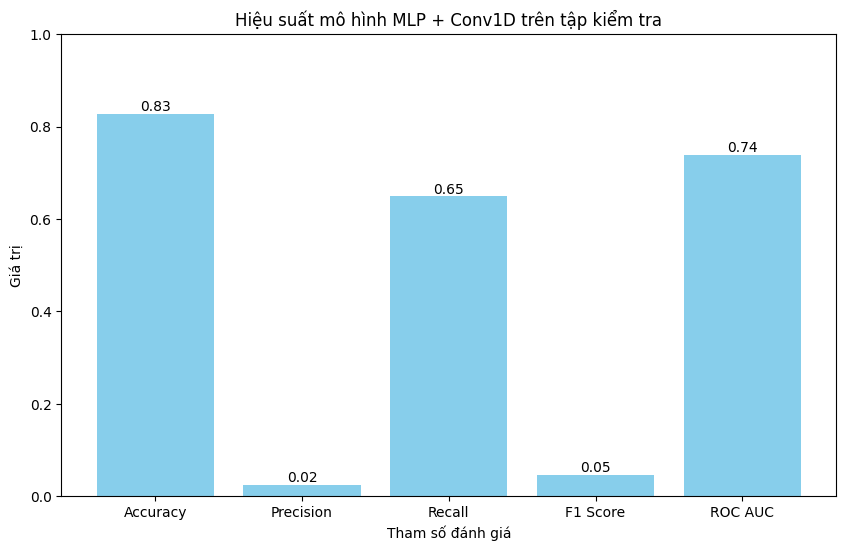

In [53]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Tham số đánh giá')
plt.ylabel('Giá trị')
plt.title('Hiệu suất mô hình MLP + Conv1D trên tập kiểm tra')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

### Nhận Xét
- Accuracy cao (86.90%) nhưng Precision rất thấp (4.89%), cho thấy mô hình dự đoán rất nhiều trường hợp dương tính sai (False Positives).

- Recall khá cao (60.77%), nghĩa là mô hình phát hiện được phần lớn các trường hợp dương tính thực tế, nhưng đánh đổi bằng việc có nhiều dự đoán sai.

- F1-Score thấp (9.05%), phản ánh sự cân bằng không tốt giữa Precision và Recall.

### Input → Dense(128) → Conv1D(4 filters) → Conv1D(8 filters) → Output (2 classes)


### **Tóm Tắt Kiến Trúc Mô Hình CNN (MLP + 2 Conv1D)**

Mô hình kết hợp giữa **Fully Connected (Dense)** và **Convolutional 1D (Conv1D)** với hai lớp Conv1D nhằm trích xuất các đặc trưng cấp cao và các mẫu cục bộ trong dữ liệu. Dưới đây là tóm tắt kiến trúc:

---

### **Kiến Trúc Mô Hình**

1. **Lớp Đầu Vào (Input Layer)**  
   - **Kích thước đầu vào**: `(số đặc trưng, 1)`.

2. **Khối Dense Đầu Tiên**  
   - **Reshape**: Chuyển đổi kích thước từ `(số đặc trưng, 1)` thành `(số đặc trưng,)`.  
   - **Dense Layer (128 nơ-ron)**: Trích xuất các đặc trưng cấp cao.  
   - **Batch Normalization**: Chuẩn hóa đầu ra để ổn định quá trình huấn luyện.  
   - **ReLU Activation**: Giới thiệu tính phi tuyến.  
   - **Dropout (20%)**: Giảm overfitting bằng cách tắt ngẫu nhiên 20% nơ-ron.

3. **Khối Convolutional 1D Thứ Nhất**  
   - **Reshape**: Chuyển đổi đầu ra từ Dense thành `(128, 1)` để phù hợp với Conv1D.  
   - **Conv1D (4 bộ lọc, kernel size = 3)**: Phát hiện các mẫu cục bộ.  
   - **Batch Normalization**: Chuẩn hóa đầu ra từ Conv1D.  
   - **ReLU Activation**: Thêm tính phi tuyến.  
   - **AveragePooling1D (pool size = 2)**: Giảm kích thước đầu ra một nửa.

4. **Khối Convolutional 1D Thứ Hai**  
   - **Conv1D (8 bộ lọc, kernel size = 5)**: Tiếp tục phát hiện các mẫu cục bộ.  
   - **Batch Normalization**: Chuẩn hóa đầu ra từ Conv1D.  
   - **ReLU Activation**: Thêm tính phi tuyến.  
   - **AveragePooling1D (pool size = 2)**: Giảm kích thước đầu ra một nửa.

5. **Khối Kết Nối Đầu Ra**  
   - **Flatten**: Làm phẳng đầu ra từ `(kích thước còn lại, 8)` thành vector 1D.  
   - **Dense (2 nơ-ron)**: Lớp đầu ra với 2 nơ-ron cho phân loại nhị phân.  
   - **Softmax Activation**: Chuyển đổi thành xác suất của 2 lớp.

---

### **Tóm Tắt Mô Hình**

| **Layer (type)**                 | **Output Shape**          | **Param #**    | **Giải Thích**                       |
|----------------------------------|---------------------------|----------------|--------------------------------------|
| **Input**                        | `(None, số đặc trưng, 1)`| 0              | Lớp đầu vào.                         |
| **Reshape**                      | `(None, số đặc trưng)`   | 0              | Chuyển đổi thành vector 1D.          |
| **Dense (128)**                  | `(None, 128)`            | `số đặc trưng * 128 + 128` | Fully connected 128 nơ-ron.  |
| **BatchNormalization**           | `(None, 128)`            | 512            | Chuẩn hóa đầu ra.                    |
| **ReLU Activation**              | `(None, 128)`            | 0              | Hàm kích hoạt ReLU.                  |
| **Dropout (20%)**                | `(None, 128)`            | 0              | Dropout để giảm overfitting.         |
| **Reshape**                      | `(None, 128, 1)`         | 0              | Chuyển đổi cho Conv1D.               |
| **Conv1D (4 filters, 3 kernel)** | `(None, 126, 4)`         | 16             | 4 bộ lọc với kernel size = 3.        |
| **BatchNormalization**           | `(None, 126, 4)`         | 16             | Chuẩn hóa đầu ra từ Conv1D.          |
| **ReLU Activation**              | `(None, 126, 4)`         | 0              | Hàm kích hoạt ReLU.                  |
| **AveragePooling1D (pool size=2)**| `(None, 63, 4)`         | 0              | Giảm kích thước đầu ra một nửa.      |
| **Conv1D (8 filters, 5 kernel)** | `(None, 59, 8)`          | 168            | 8 bộ lọc với kernel size = 5.        |
| **BatchNormalization**           | `(None, 59, 8)`          | 32             | Chuẩn hóa đầu ra từ Conv1D.          |
| **ReLU Activation**              | `(None, 59, 8)`          | 0              | Hàm kích hoạt ReLU.                  |
| **AveragePooling1D (pool size=2)**| `(None, 29, 8)`         | 0              | Giảm kích thước đầu ra một nửa.      |
| **Flatten**                      | `(None, 232)`            | 0              | Làm phẳng đầu ra thành vector 1D.    |
| **Dense (2)**                    | `(None, 2)`              | 466            | Lớp đầu ra với 2 nơ-ron.             |
| **Softmax Activation**           | `(None, 2)`              | 0              | Chuyển thành xác suất.               |

---

### **Tổng Số Tham Số**

- **Số tham số** sẽ bao gồm:
  - **Tham số từ Dense Layer**: `số đặc trưng * 128 + 128`  
  - **Tham số từ Conv1D**: `(số bộ lọc * kernel size * đầu vào) + số bộ lọc`  
  - **Batch Normalization**: `2 * số nơ-ron hoặc số bộ lọc`

---

### **Nhận Xét**

- **Mô hình kết hợp** giữa Dense và hai lớp Conv1D giúp trích xuất cả đặc trưng cấp cao và các mẫu cục bộ.  
- **AveragePooling** giúp giảm kích thước đầu ra và tăng hiệu quả tính toán.  
- **Batch Normalization và Dropout** giúp ổn định quá trình huấn luyện và giảm overfitting.

Nếu cần thêm hỗ trợ hoặc chỉnh sửa mô hình, hãy cho tôi biết nhé! 🚀😊

In [54]:
### Input → Dense(128) → Conv1D(4 filters) → Conv1D(8 filters) → Output (2 classes)
# Định nghĩa lớp đầu vào với kích thước (số đặc trưng, 1)
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))

# Chuyển đổi kích thước từ (số đặc trưng, 1) sang (số đặc trưng,)
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)

# Lớp Fully Connected (Dense) đầu tiên với 128 neuron, khởi tạo trọng số bằng VarianceScaling
FC0 = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(RS0)

# Batch Normalization để chuẩn hóa đầu ra của lớp Dense, giúp ổn định quá trình huấn luyện
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)

# Hàm kích hoạt ReLU để thêm tính phi tuyến cho mô hình
AC0 = keras.layers.Activation('relu')(BN0)

# Dropout để tắt ngẫu nhiên 20% neuron, giúp giảm overfitting
DP0 = keras.layers.Dropout(0.2)(AC0)

# Chuyển đổi kích thước từ (128,) sang (128, 1) để phù hợp với lớp Conv1D
RS1 = keras.layers.Reshape((128, 1))(DP0)

# Lớp Convolutional 1D với 4 bộ lọc (filters), kernel size = 3 và strides = 1
FC1 = keras.layers.Conv1D(4, 3, strides=1)(RS1)

# Batch Normalization để chuẩn hóa đầu ra của lớp Conv1D
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)

# Hàm kích hoạt ReLU cho lớp Conv1D
AC1 = keras.layers.Activation('relu')(BN1)

# Lớp Average Pooling 1D với kích thước cửa sổ (pool_size) là 2, giảm kích thước đầu ra một nửa
Pool1 = keras.layers.AveragePooling1D(pool_size=2)(AC1)

# Lớp Convolutional 1D thứ hai với 8 bộ lọc (filters), kernel size = 5 và strides = 1
FC2 = keras.layers.Conv1D(8, 5, strides=1)(Pool1)

# Batch Normalization để chuẩn hóa đầu ra của lớp Conv1D thứ hai
BN2 = keras.layers.BatchNormalization(axis=-1)(FC2)

# Hàm kích hoạt ReLU cho lớp Conv1D thứ hai
AC2 = keras.layers.Activation('relu')(BN2)

# Lớp Average Pooling 1D với kích thước cửa sổ (pool_size) là 2, giảm kích thước đầu ra một nửa
Pool2 = keras.layers.AveragePooling1D(pool_size=2)(AC2)

# Làm phẳng đầu ra từ lớp Pooling để chuyển thành vector 1 chiều cho lớp Dense
FL1 = keras.layers.Flatten()(Pool2)

# Lớp Fully Connected (Dense) cuối cùng với 2 neuron, tương ứng với 2 lớp đầu ra
FC3 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(FL1)

# Hàm kích hoạt Softmax để chuyển đổi đầu ra thành xác suất của 2 lớp
outputs = keras.layers.Activation('softmax')(FC3)

# Định nghĩa mô hình với đầu vào và đầu ra đã tạo
myCNN1D2 = keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình với:
# - Optimizer: Adam (mặc định learning rate = 0.001)
# - Loss: categorical_crossentropy (dùng cho phân loại với nhãn one-hot encoded)
# - Metrics: accuracy (độ chính xác)
myCNN1D2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.006),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Hiển thị tóm tắt kiến trúc mô hình, bao gồm kích thước đầu ra và số lượng tham số của từng lớp
myCNN1D2.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 41, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_5 (Reshape)             │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 126, 4)         │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 126, 4)         │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 126, 4)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 63, 4)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 59, 8)          │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 59, 8)          │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 59, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_1             │ (None, 29, 8)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 232)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │           466 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,586 (25.73 KB)

 Trainable params: 6,306 (24.63 KB)

 Non-trainable params: 280 (1.09 KB)

In [55]:
class_weight = {0: 1, 1: 3}

myCNN1D2.fit(x_train,y_train,epochs=60,verbose=1, class_weight=class_weight)

Epoch 1/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6981 - loss: 0.8649
Epoch 2/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7574 - loss: 0.7031
Epoch 3/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7789 - loss: 0.6508
Epoch 4/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.6404
Epoch 5/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7842 - loss: 0.6242
Epoch 6/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7911 - loss: 0.6292
Epoch 7/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8039 - loss: 0.5969
Epoch 8/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8066 - loss: 0.5919
Epoch 9/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7980 - loss: 0.6123
Epoch 10/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8159 - loss: 0.5724
Epoch 11/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8022 - loss: 0.5722
Epoch 12/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

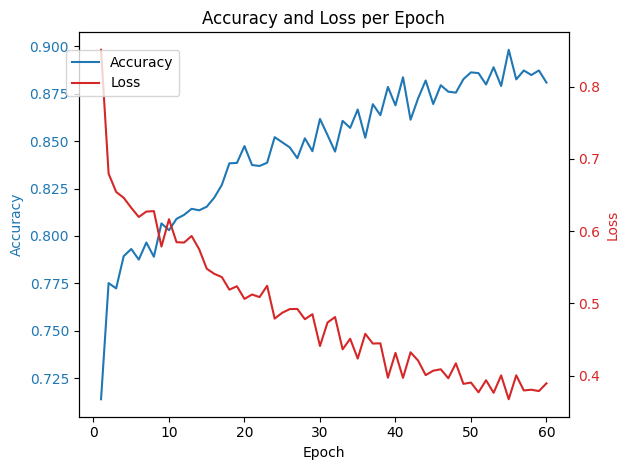

In [64]:
import matplotlib.pyplot as plt

# Sample data for accuracy and loss for each epoch
epochs = list(range(1, 61))  # Assuming 60 epochs
accuracy = [0.7138, 0.7751, 0.7723, 0.7893, 0.7931, 0.7875, 0.7965, 0.7890, 0.8066, 0.8030,
            0.8090, 0.8111, 0.8143, 0.8135, 0.8154, 0.8202, 0.8269, 0.8383, 0.8385, 0.8474,
            0.8374, 0.8369, 0.8386, 0.8521, 0.8494, 0.8467, 0.8410, 0.8515, 0.8447, 0.8617,
            0.8532, 0.8445, 0.8607, 0.8570, 0.8667, 0.8518, 0.8695, 0.8637, 0.8786, 0.8689,
            0.8837, 0.8613, 0.8726, 0.8820, 0.8696, 0.8795, 0.8761, 0.8756, 0.8827, 0.8863,
            0.8859, 0.8799, 0.8890, 0.8791, 0.8982, 0.8826, 0.8873, 0.8849, 0.8873, 0.8809]
loss = [0.8509, 0.6796, 0.6542, 0.6461, 0.6322, 0.6195, 0.6270, 0.6276, 0.5786, 0.6164,
        0.5846, 0.5841, 0.5932, 0.5748, 0.5479, 0.5408, 0.5363, 0.5189, 0.5236, 0.5061,
        0.5122, 0.5086, 0.5243, 0.4788, 0.4869, 0.4920, 0.4922, 0.4780, 0.4849, 0.4409,
        0.4734, 0.4810, 0.4363, 0.4509, 0.4235, 0.4578, 0.4443, 0.4446, 0.3970, 0.4314,
        0.3968, 0.4322, 0.4207, 0.4006, 0.4067, 0.4087, 0.3963, 0.4169, 0.3885, 0.3903,
        0.3768, 0.3935, 0.3761, 0.4002, 0.3672, 0.4003, 0.3794, 0.3804, 0.3785, 0.3893]
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot accuracy
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='tab:blue')
ax1.plot(epochs, accuracy, color='tab:blue', label='Accuracy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot loss
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='tab:red')
ax2.plot(epochs, loss, color='tab:red', label='Loss')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and legend
plt.title('Accuracy and Loss per Epoch')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Show plot
plt.show()

In [56]:
test_loss,test_acc = myCNN1D2.evaluate(x_test,y_test)
print(test_acc)
print(test_loss)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.8447 - loss: 0.3926
0.841306209564209
0.40182265639305115


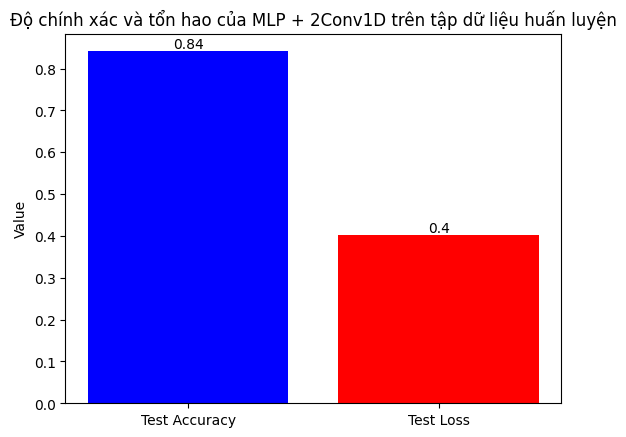

In [57]:
import matplotlib.pyplot as plt

# Values for test accuracy and test loss
test_acc = 0.841306209564209
test_loss = 0.40182265639305115

# Labels for the x-axis
labels = ['Test Accuracy', 'Test Loss']

# Values for the y-axis
values = [test_acc, test_loss]

# Create a figure and axis
fig, ax = plt.subplots()

# Create bar chart
bars = ax.bar(labels, values, color=['blue', 'red'])

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Value')
ax.set_title('Độ chính xác và tổn hao của MLP + 2Conv1D trên tập dữ liệu huấn luyện')

# Show plot
plt.show()

In [58]:
from sklearn import metrics
predlabel = myCNN1D2.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[26697  4974]
 [   85   123]]


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Confusion matrix values
tn, fp, fn, tp = 26697, 4974,85,123

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

accuracy, precision, recall, f1, roc_auc

(0.8413061890272593,
 np.float64(0.02413184226015303),
 np.float64(0.5913461538461539),
 np.float64(0.04637134778510839),
 np.float64(0.7171469804941673))

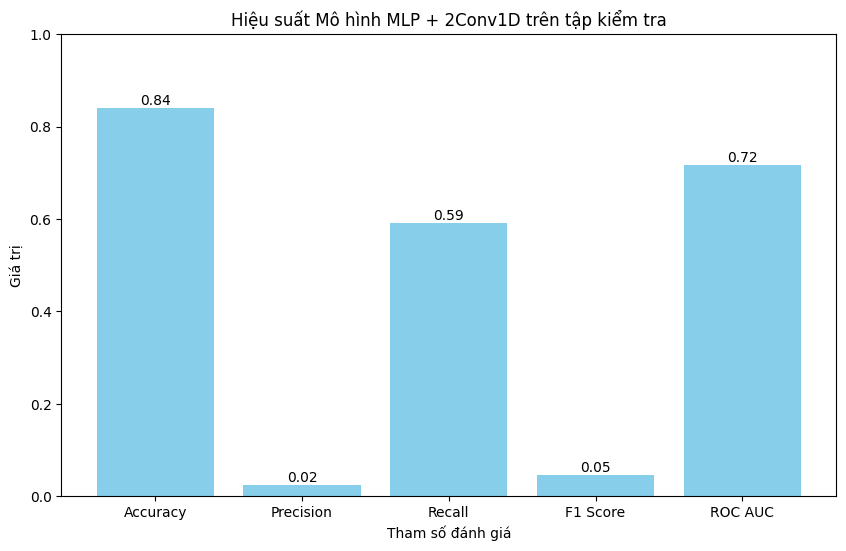

In [60]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Tham số đánh giá')
plt.ylabel('Giá trị')
plt.title('Hiệu suất Mô hình MLP + 2Conv1D trên tập kiểm tra')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

### **Giải Thích Kiến Trúc Mô Hình `myCNN1D3`**

Dưới đây là phân tích chi tiết kiến trúc mô hình kết hợp **MLP và Conv1D** với ba khối chính: một khối Dense, một khối Conv1D, và một khối Dense lớn trước lớp đầu ra.

---

### **1. Tóm Tắt Kiến Trúc**

| **Layer (type)**                  | **Output Shape**       | **Giải Thích**                                       |
|-----------------------------------|------------------------|------------------------------------------------------|
| **Input**                         | `(None, số đặc trưng, 1)` | Lớp đầu vào với kích thước `(số đặc trưng, 1)`.    |
| **Reshape**                       | `(None, số đặc trưng)` | Chuyển đổi thành vector 1D.                        |
| **Dense (32 nơ-ron)**             | `(None, 32)`           | Lớp Fully Connected với 32 nơ-ron.                 |
| **Batch Normalization**           | `(None, 32)`           | Chuẩn hóa đầu ra từ Dense.                         |
| **ReLU Activation**               | `(None, 32)`           | Hàm kích hoạt ReLU.                                |
| **Dropout (20%)**                 | `(None, 32)`           | Dropout để giảm overfitting.                       |
| **Reshape**                       | `(None, 32, 1)`        | Chuyển đổi để phù hợp với Conv1D.                  |
| **Conv1D (2 bộ lọc, kernel = 3)**| `(None, 30, 2)`        | Conv1D với 2 bộ lọc, kernel size = 3.              |
| **Batch Normalization**           | `(None, 30, 2)`        | Chuẩn hóa đầu ra từ Conv1D.                        |
| **ReLU Activation**               | `(None, 30, 2)`        | Hàm kích hoạt ReLU.                                |
| **MaxPooling1D (pool size = 2)**  | `(None, 15, 2)`        | Giảm kích thước đầu ra một nửa.                    |
| **Flatten**                       | `(None, 30)`           | Làm phẳng đầu ra thành vector 1D.                  |
| **Dense (512 nơ-ron)**            | `(None, 512)`          | Lớp Fully Connected với 512 nơ-ron.                |
| **Batch Normalization**           | `(None, 512)`          | Chuẩn hóa đầu ra từ Dense.                         |
| **ReLU Activation**               | `(None, 512)`          | Hàm kích hoạt ReLU.                                |
| **Dense (2 nơ-ron)**              | `(None, 2)`            | Lớp đầu ra với 2 nơ-ron cho phân loại nhị phân.   |
| **Softmax Activation**            | `(None, 2)`            | Chuyển đầu ra thành xác suất cho 2 lớp.            |

---

### **2. Phân Tích Chi Tiết**

1. **Lớp Đầu Vào (InputLayer)**:  
   - **Kích thước**: `(số đặc trưng, 1)` – Dữ liệu đầu vào có dạng `(None, số đặc trưng, 1)`, với `None` là batch size không cố định.

2. **Khối Dense Đầu Tiên**:  
   - **Dense (32 nơ-ron)**: Trích xuất đặc trưng cấp cao ban đầu.  
   - **Batch Normalization**: Giúp ổn định và tăng tốc độ huấn luyện.  
   - **ReLU Activation**: Thêm tính phi tuyến cho mô hình.  
   - **Dropout (20%)**: Giảm nguy cơ overfitting bằng cách tắt ngẫu nhiên 20% nơ-ron.

3. **Khối Convolutional**:  
   - **Reshape**: Chuyển đổi đầu ra từ Dense thành `(32, 1)` để phù hợp với Conv1D.  
   - **Conv1D (2 bộ lọc, kernel size = 3)**: Tìm kiếm các mẫu cục bộ trong dữ liệu.  
   - **Batch Normalization**: Ổn định đầu ra từ Conv1D.  
   - **ReLU Activation**: Giới thiệu tính phi tuyến.  
   - **MaxPooling1D (pool size = 2)**: Giảm kích thước đầu ra xuống còn `(15, 2)`.

4. **Khối Dense Thứ Hai**:  
   - **Flatten**: Chuyển đổi đầu ra từ `(15, 2)` thành vector 1D với kích thước `(30,)`.  
   - **Dense (512 nơ-ron)**: Lớp Fully Connected lớn, giúp học các đặc trưng sâu hơn.  
   - **Batch Normalization**: Ổn định đầu ra từ Dense.  
   - **ReLU Activation**: Tăng khả năng học phi tuyến.

5. **Lớp Đầu Ra**:  
   - **Dense (2 nơ-ron)**: Lớp cuối cùng cho phân loại nhị phân.  
   - **Softmax Activation**: Chuyển đổi thành xác suất cho hai lớp (0 và 1).

---

### **3. Tổng Quan và Nhận Xét**

- **Số lượng tham số** sẽ tương đối nhỏ do sử dụng số lượng nơ-ron và bộ lọc vừa phải.  
- **Sự kết hợp giữa Dense và Conv1D** giúp mô hình tận dụng khả năng học đặc trưng cấp cao và cục bộ.  
- **Batch Normalization và Dropout** giúp ổn định quá trình huấn luyện và giảm overfitting.  

Nếu cần giải thích thêm hoặc gợi ý cải thiện, hãy cho tôi biết nhé! 🚀😊

In [61]:
# Định nghĩa lớp đầu vào với kích thước (số đặc trưng, 1)
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))

# Chuyển đổi kích thước từ (số đặc trưng, 1) sang (số đặc trưng,)
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)  # Reshape để phù hợp với lớp Dense

# Lớp Fully Connected (Dense) đầu tiên với 32 nơ-ron
FC0 = keras.layers.Dense(32, bias_initializer=keras.initializers.VarianceScaling())(RS0)
# Batch Normalization giúp chuẩn hóa đầu ra từ lớp Dense, cải thiện tốc độ và ổn định huấn luyện
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)
# Hàm kích hoạt ReLU để thêm tính phi tuyến cho mô hình
AC0 = keras.layers.Activation('relu')(BN0)
# Dropout để tắt ngẫu nhiên 20% nơ-ron, giúp giảm nguy cơ overfitting
DP0 = keras.layers.Dropout(0.2)(AC0)

# Chuyển đổi kích thước từ (32,) sang (32, 1) để phù hợp với lớp Conv1D
RS1 = keras.layers.Reshape((32, 1))(DP0)

# Lớp Convolutional 1D với 2 bộ lọc, kernel size = 3 và strides = 1
FC1 = keras.layers.Conv1D(2, 3, strides=1)(RS1)
# Batch Normalization giúp chuẩn hóa đầu ra từ Conv1D, ổn định việc huấn luyện
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)
# Hàm kích hoạt ReLU để thêm tính phi tuyến cho lớp Conv1D
AC1 = keras.layers.Activation('relu')(BN1)
# MaxPooling 1D với kích thước cửa sổ (pool_size) là 2, giảm kích thước đầu ra một nửa
Pool1 = keras.layers.MaxPool1D(pool_size=2)(AC1)

# Làm phẳng đầu ra từ MaxPooling để chuyển thành vector 1 chiều
FL1 = keras.layers.Flatten()(Pool1)

# Lớp Fully Connected với 512 nơ-ron, học các đặc trưng sâu hơn
FC2 = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)
# Batch Normalization giúp chuẩn hóa đầu ra từ lớp Dense
BN2 = keras.layers.BatchNormalization(axis=-1)(FC2)
# Hàm kích hoạt ReLU để thêm tính phi tuyến cho lớp Dense
AC2 = keras.layers.Activation('relu')(BN2)

# Lớp Fully Connected cuối cùng với 2 nơ-ron cho 2 lớp đầu ra
FC3 = keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(AC2)
# Hàm kích hoạt Softmax để chuyển đổi đầu ra thành xác suất cho 2 lớp
outputs = keras.layers.Activation('softmax')(FC3)

# Định nghĩa mô hình với đầu vào và đầu ra đã tạo
myCNN1D3 = keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình với:
# - Optimizer: Adam (mặc định learning rate = 0.001)
# - Loss: categorical_crossentropy (dùng cho phân loại với nhãn one-hot encoded)
# - Metrics: accuracy (độ chính xác)
myCNN1D3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.006),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

# Hiển thị tóm tắt kiến trúc mô hình, bao gồm kích thước đầu ra và số lượng tham số của từng lớp
myCNN1D3.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 41, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_6 (Reshape)             │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ (None, 32, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 30, 2)          │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 30, 2)          │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 30, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 15, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │        15,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │         1,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,434 (79.82 KB)

 Trainable params: 19,342 (75.55 KB)

 Non-trainable params: 1,092 (4.27 KB)

### **Giải Thích `myCNN1D3.summary()`**

Dưới đây là phân tích chi tiết từng lớp trong mô hình **myCNN1D3** dựa trên kết quả `summary()`.

---

### **Kiến Trúc Mô Hình**

| **Layer (type)**                 | **Output Shape**        | **Param #**   | **Giải Thích**                                      |
|----------------------------------|-------------------------|---------------|-----------------------------------------------------|
| **input_layer_6 (InputLayer)**   | `(None, 41, 1)`        | 0             | Lớp đầu vào với kích thước `(41, 1)`.              |
| **reshape_8 (Reshape)**          | `(None, 41)`           | 0             | Chuyển đổi từ `(41, 1)` thành `(41,)`.             |
| **dense_18 (Dense)**             | `(None, 32)`           | 1,344         | Fully Connected với 32 nơ-ron.                     |
| **batch_normalization_15**       | `(None, 32)`           | 128           | Chuẩn hóa đầu ra từ lớp Dense.                     |
| **activation_21 (Activation)**   | `(None, 32)`           | 0             | Hàm kích hoạt ReLU.                                |
| **dropout_10 (Dropout)**         | `(None, 32)`           | 0             | Dropout 20% để giảm overfitting.                   |
| **reshape_9 (Reshape)**          | `(None, 32, 1)`        | 0             | Chuyển đổi thành `(32, 1)` để phù hợp với Conv1D.  |
| **conv1d_3 (Conv1D)**            | `(None, 30, 2)`        | 8             | Conv1D với 2 bộ lọc, kernel size = 3.              |
| **batch_normalization_16**       | `(None, 30, 2)`        | 8             | Chuẩn hóa đầu ra từ Conv1D.                        |
| **activation_22 (Activation)**   | `(None, 30, 2)`        | 0             | Hàm kích hoạt ReLU.                                |
| **max_pooling1d_1**              | `(None, 15, 2)`        | 0             | MaxPooling giảm kích thước còn `(15, 2)`.          |
| **flatten_2 (Flatten)**          | `(None, 30)`           | 0             | Làm phẳng đầu ra thành vector 1D với kích thước 30.|
| **dense_19 (Dense)**             | `(None, 512)`          | 15,872        | Fully Connected với 512 nơ-ron.                    |
| **batch_normalization_17**       | `(None, 512)`          | 2,048         | Chuẩn hóa đầu ra từ lớp Dense.                     |
| **activation_23 (Activation)**   | `(None, 512)`          | 0             | Hàm kích hoạt ReLU.                                |
| **dense_20 (Dense)**             | `(None, 2)`            | 1,026         | Lớp đầu ra với 2 nơ-ron cho phân loại nhị phân.   |
| **activation_24 (Activation)**   | `(None, 2)`            | 0             | Hàm kích hoạt Softmax để tạo xác suất cho 2 lớp.   |

---

### **Tổng Số Tham Số**

- **Total params (Tổng số tham số)**: **20,434 (79.82 KB)**  
- **Trainable params (Tham số có thể huấn luyện)**: **19,342 (75.55 KB)**  
- **Non-trainable params (Tham số không huấn luyện)**: **1,092 (4.27 KB)**  

---

### **Phân Tích Chi Tiết Các Tham Số**

1. **Dense Layer (32 nơ-ron)**:  
   - **Tham số** = \(41 \times 32 + 32 = 1,344\)  
   
2. **Batch Normalization (sau Dense 32)**:  
   - **Tham số** = \(2 \times 32 = 64 + 64 = 128\) (2 tham số cho mỗi nơ-ron: trung bình và phương sai).  

3. **Conv1D (2 bộ lọc, kernel size = 3)**:  
   - **Tham số** = \(3 \times 1 \times 2 + 2 = 8\) (kernel + bias).  

4. **Batch Normalization (sau Conv1D)**:  
   - **Tham số** = \(2 \times 2 = 4 + 4 = 8\).  

5. **Dense Layer (512 nơ-ron)**:  
   - **Tham số** = \(30 \times 512 + 512 = 15,872\).  

6. **Batch Normalization (sau Dense 512)**:  
   - **Tham số** = \(2 \times 512 = 1,024 + 1,024 = 2,048\).  

7. **Dense Layer (2 nơ-ron)**:  
   - **Tham số** = \(512 \times 2 + 2 = 1,026\).  

---

### **Nhận Xét**

1. **Kích thước mô hình nhỏ gọn** với chỉ **20,434 tham số**.  
2. **Kết hợp giữa Dense và Conv1D** giúp mô hình học được cả đặc trưng tổng thể và cục bộ.  
3. **Batch Normalization và Dropout** giúp tăng độ ổn định và giảm overfitting.  
4. **Hai khối chính**:  
   - **Khối Dense đầu tiên** giảm kích thước đầu vào.  
   - **Khối Conv1D** trích xuất mẫu cục bộ.  
   - **Khối Dense lớn** giúp tổng hợp và phân loại đặc trưng.  

Nếu bạn cần thêm phân tích hoặc điều chỉnh mô hình, hãy cho tôi biết nhé! 🚀😊

In [62]:
class_weight = {0: 1, 1: 3}

myCNN1D3.fit(x_train,y_train,epochs=60,verbose=1, class_weight=class_weight)

Epoch 1/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6352 - loss: 1.2783
Epoch 2/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7199 - loss: 0.7989
Epoch 3/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7523 - loss: 0.7314
Epoch 4/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7555 - loss: 0.7079
Epoch 5/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7606 - loss: 0.6752
Epoch 6/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7479 - loss: 0.7173
Epoch 7/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7513 - loss: 0.7025
Epoch 8/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7697 - loss: 0.6607
Epoch 9/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7583 - loss: 0.6668
Epoch 10/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7700 - loss: 0.6620
Epoch 11/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7653 - loss: 0.6596
Epoch 12/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

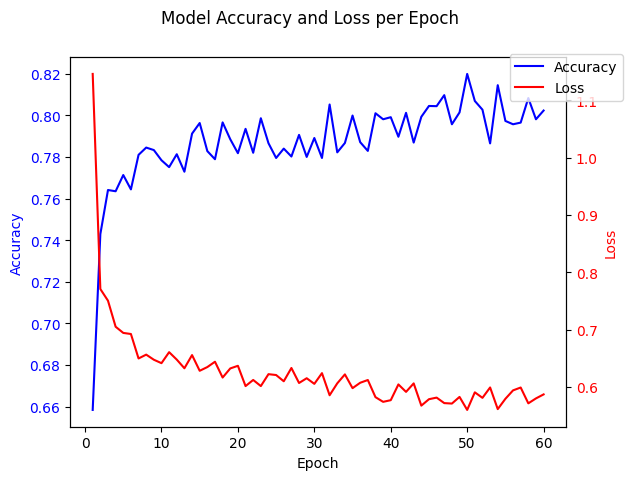

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# List of accuracy and loss values from the training log
epochs = np.arange(1, 61)

accuracy = [
    0.6584, 0.7429, 0.7641, 0.7635, 0.7713, 0.7644, 0.7810, 0.7845, 0.7833, 0.7784,
    0.7751, 0.7813, 0.7729, 0.7912, 0.7963, 0.7828, 0.7789, 0.7966, 0.7885, 0.7818,
    0.7935, 0.7820, 0.7986, 0.7866, 0.7795, 0.7840, 0.7802, 0.7906, 0.7800, 0.7891,
    0.7795, 0.8052, 0.7822, 0.7867, 0.7999, 0.7871, 0.7829, 0.8010, 0.7981, 0.7991,
    0.7897, 0.8012, 0.7869, 0.7993, 0.8045, 0.8044, 0.8097, 0.7957, 0.8014, 0.8199,
    0.8069, 0.8027, 0.7865, 0.8145, 0.7973, 0.7957, 0.7965, 0.8083, 0.7981, 0.8023
]

loss = [
    1.1461, 0.7707, 0.7503, 0.7049, 0.6941, 0.6922, 0.6495, 0.6562, 0.6473, 0.6413,
    0.6605, 0.6475, 0.6324, 0.6554, 0.6280, 0.6345, 0.6438, 0.6162, 0.6321, 0.6367,
    0.6013, 0.6120, 0.6013, 0.6221, 0.6206, 0.6097, 0.6329, 0.6067, 0.6150, 0.6052,
    0.6239, 0.5853, 0.6061, 0.6217, 0.5977, 0.6071, 0.6119, 0.5820, 0.5738, 0.5767,
    0.6042, 0.5912, 0.6060, 0.5672, 0.5784, 0.5812, 0.5716, 0.5708, 0.5824, 0.5597,
    0.5904, 0.5808, 0.5989, 0.5611, 0.5791, 0.5938, 0.5988, 0.5712, 0.5798, 0.5868
]

# Plot accuracy and loss
fig, ax1 = plt.subplots()

# Plot accuracy on the primary y-axis
ax1.plot(epochs, accuracy, 'b-', label='Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for the loss values
ax2 = ax1.twinx()
ax2.plot(epochs, loss, 'r-', label='Loss')
ax2.set_ylabel('Loss', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Title and combined legend
fig.suptitle('Model Accuracy and Loss per Epoch')
fig.legend(loc='upper right', bbox_to_anchor=(1, 0.9))

plt.show()


In [63]:
test_loss,test_acc = myCNN1D3.evaluate(x_test,y_test)
print(test_acc)
print(test_loss)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step - accuracy: 0.7665 - loss: 0.4507
0.7673389911651611
0.4515165388584137


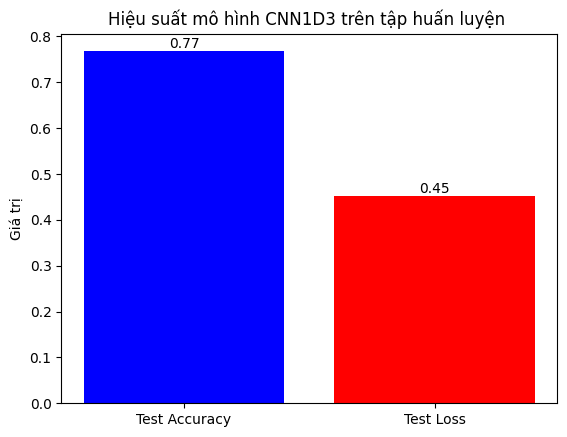

In [64]:
import matplotlib.pyplot as plt

# Values for test accuracy and test loss
test_acc = 0.7673389911651611
test_loss = 0.4515165388584137

# Labels for the x-axis
labels = ['Test Accuracy', 'Test Loss']

# Values for the y-axis
values = [test_acc, test_loss]

# Create a figure and axis
fig, ax = plt.subplots()

# Create bar chart
bars = ax.bar(labels, values, color=['blue', 'red'])

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Giá trị')
ax.set_title('Hiệu suất mô hình CNN1D3 trên tập huấn luyện ')

# Show plot
plt.show()

In [65]:
from sklearn import metrics
predlabel = myCNN1D3.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step
[[24302  7369]
 [   48   160]]


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Confusion matrix values
tn, fp, fn, tp = confMat.ravel()

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.7673390005960037
Precision: 0.021251162172931333
Recall: 0.7692307692307693
F1 Score: 0.041359700142173966
ROC AUC: 0.7682786727970019


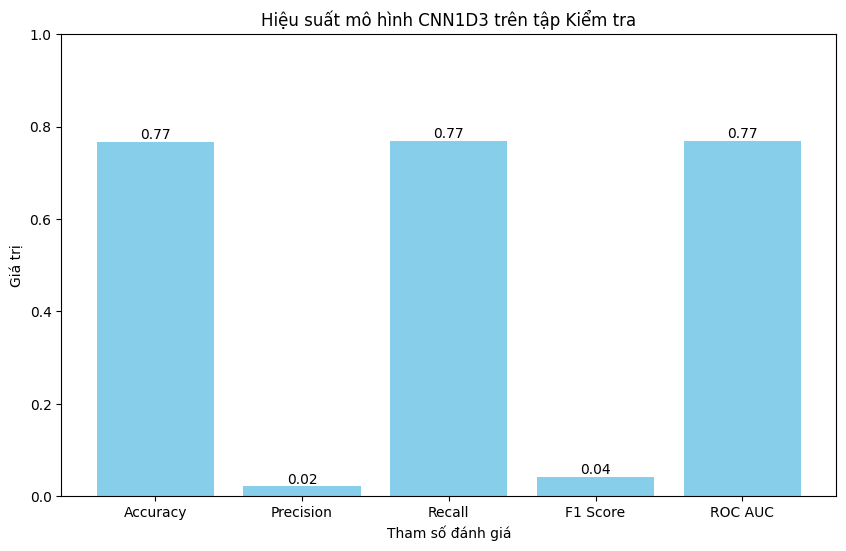

In [67]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Tham số đánh giá')
plt.ylabel('Giá trị')
plt.title('Hiệu suất mô hình CNN1D3 trên tập Kiểm tra')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [68]:
#CNN

# Định nghĩa lớp đầu vào với kích thước (số đặc trưng, 1)
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))  # Dữ liệu đầu vào có dạng (số đặc trưng, 1)

# ===== Khối Fully Connected (Dense) Đầu Tiên =====
# Chuyển đổi kích thước từ (số đặc trưng, 1) sang (số đặc trưng,)
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)  # Reshape để phù hợp với lớp Dense

# Lớp Dense với 64 nơ-ron, khởi tạo trọng số bằng VarianceScaling
FC0 = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)

# Batch Normalization giúp chuẩn hóa đầu ra từ lớp Dense, cải thiện tốc độ và ổn định huấn luyện
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)

# Hàm kích hoạt ReLU để thêm tính phi tuyến cho mô hình
AC0 = keras.layers.Activation('relu')(BN0)

# Dropout để tắt ngẫu nhiên 20% nơ-ron, giúp giảm nguy cơ overfitting
DP0 = keras.layers.Dropout(0.2)(AC0)

# ===== Khối Convolutional Đầu Tiên =====
# Chuyển đổi kích thước từ (64,) sang (64, 1) để phù hợp với lớp Conv1D
RS1 = keras.layers.Reshape((64, 1))(DP0)

# Lớp Convolutional 1D với 2 bộ lọc (filters), kernel size = 3 và strides = 1
FC1 = keras.layers.Conv1D(2, 3, strides=1)(RS1)

# Batch Normalization giúp chuẩn hóa đầu ra từ lớp Conv1D
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)

# Hàm kích hoạt ReLU để thêm tính phi tuyến cho lớp Conv1D
AC1 = keras.layers.Activation('relu')(BN1)

# Average Pooling 1D với pool size = 2 để giảm kích thước đầu ra một nửa
Pool1 = keras.layers.AveragePooling1D(pool_size=2)(AC1)

# ===== Khối Convolutional Thứ Hai =====
# Lớp Convolutional 1D với 4 bộ lọc (filters), kernel size = 5 và strides = 1
FC2 = keras.layers.Conv1D(4, 5, strides=1)(Pool1)

# Batch Normalization giúp chuẩn hóa đầu ra từ lớp Conv1D thứ hai
BN2 = keras.layers.BatchNormalization(axis=-1)(FC2)

# Hàm kích hoạt ReLU để thêm tính phi tuyến cho lớp Conv1D
AC2 = keras.layers.Activation('relu')(BN2)

# Average Pooling 1D với pool size = 2 để giảm kích thước đầu ra một nửa
Pool2 = keras.layers.AveragePooling1D(pool_size=2)(AC2)

# ===== Làm Phẳng và Khối Fully Connected Cuối Cùng =====
# Làm phẳng đầu ra từ Pooling để chuyển thành vector 1 chiều
FL1 = keras.layers.Flatten()(Pool2)

# Lớp Fully Connected với 512 nơ-ron, học các đặc trưng phức tạp hơn
FC3 = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(FL1)

# Batch Normalization giúp chuẩn hóa đầu ra từ lớp Dense
BN3 = keras.layers.BatchNormalization(axis=-1)(FC3)

# Hàm kích hoạt ReLU để thêm tính phi tuyến cho lớp Dense
AC3 = keras.layers.Activation('relu')(BN3)

# Dropout để tắt ngẫu nhiên 20% nơ-ron, giúp giảm nguy cơ overfitting
DP3 = keras.layers.Dropout(0.2)(AC3)

# ===== Lớp Đầu Ra =====
# Lớp Fully Connected cuối cùng với 2 nơ-ron cho 2 lớp đầu ra (phân loại nhị phân)
FC4 = keras.layers.Dense(2)(DP3)

# Hàm kích hoạt Softmax để chuyển đổi đầu ra thành xác suất cho 2 lớp
outputs = keras.layers.Activation('softmax')(FC4)

# ===== Định Nghĩa và Biên Dịch Mô Hình =====
# Định nghĩa mô hình với đầu vào và đầu ra đã tạo
myCNN1D4 = keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình với:
# - Optimizer: Adam (mặc định learning rate = 0.001)
# - Loss: categorical_crossentropy (dùng cho phân loại với nhãn one-hot encoded)
# - Metrics: accuracy (độ chính xác)
# Biên dịch mô hình với learning_rate = 0.006
myCNN1D4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.006),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


# Hiển thị tóm tắt kiến trúc mô hình
myCNN1D4.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 41, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 62, 2)          │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 62, 2)          │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 62, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_2             │ (None, 31, 2)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 27, 4)          │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 27, 4)          │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_20 (Activation)      │ (None, 27, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_3             │ (None, 13, 4)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 52)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │        27,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │         1,026 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 2)              │             

 Total params: 33,230 (129.80 KB)

 Trainable params: 32,066 (125.26 KB)

 Non-trainable params: 1,164 (4.55 KB)

In [69]:
class_weight = {0: 1, 1: 3}

myCNN1D4.fit(x_train,y_train,epochs=60,verbose=1, class_weight=class_weight)

Epoch 1/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6826 - loss: 1.1595
Epoch 2/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.7448
Epoch 3/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7483 - loss: 0.7231
Epoch 4/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7591 - loss: 0.7015
Epoch 5/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 0.6771
Epoch 6/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7618 - loss: 0.6750
Epoch 7/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7726 - loss: 0.6546
Epoch 8/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7639 - loss: 0.6533
Epoch 9/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7816 - loss: 0.6157
Epoch 10/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7708 - loss: 0.6586
Epoch 11/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7747 - loss: 0.6546
Epoch 12/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [70]:
test_loss,test_acc = myCNN1D4.evaluate(x_test,y_test)
print(test_acc)
print(test_loss)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step - accuracy: 0.8604 - loss: 0.2502
0.8599391579627991
0.25690507888793945


In [ ]:
tacc_50 = 0.42867931723594666
tloss_50 = 1.5892739295959473
accuracy_50 = 0.4286793165297838

tacc_25 = 0.52424556016922
tloss_25 = 1.3045079708099365
accuracy_25 = 0.5242455709745429

tacc_12 = 0.5818936824798584
tloss_12 = 0.9562158584594727
accuracy_12 = 0.5818937033890305

tacc_8 = 0.6983227729797363
tloss_8 = 0.6884428858757019
accuracy_8 = 0.6983227917807358

tacc_6 = 0.6924384236335754
tloss_6 = 0.6512476801872253
accuracy_6 = 0.6924384027187765

tacc_4 = 0.7368073463439941
tloss_4 = 0.5078661441802979
accuracy_4 = 0.7368073255923723

tacc_3 = 0.764813244342804
tloss_3 = 0.4759270250797272
accuracy_3 = 0.7648132414487555

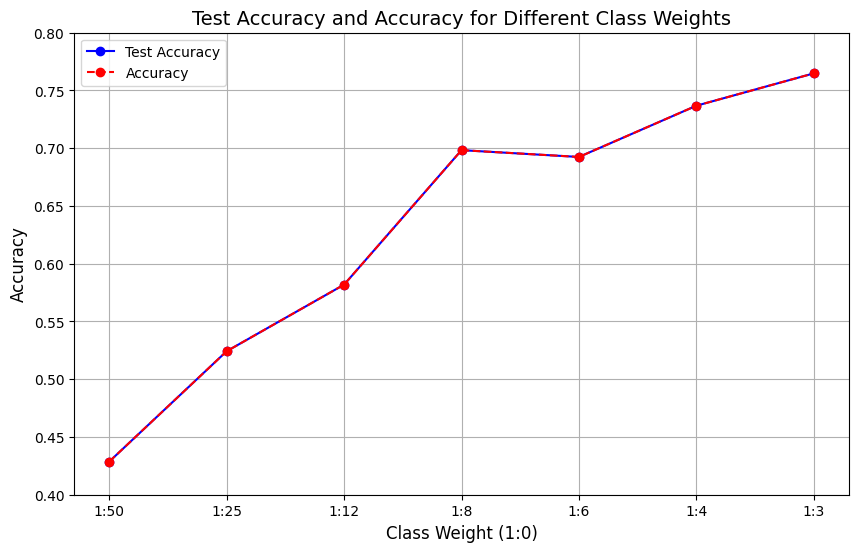

In [116]:
import matplotlib.pyplot as plt

# Class weight ratios
class_weights = ["1:50", "1:25", "1:12", "1:8", "1:6", "1:4", "1:3"]

# Test accuracy values
test_acc = [
    0.42867931723594666,
    0.52424556016922,
    0.5818936824798584,
    0.6983227729797363,
    0.6924384236335754,
    0.7368073463439941,
    0.764813244342804
]

# Accuracy values
accuracy = [
    0.4286793165297838,
    0.5242455709745429,
    0.5818937033890305,
    0.6983227917807358,
    0.6924384027187765,
    0.7368073255923723,
    0.7648132414487555
]

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot Test Accuracy
plt.plot(class_weights, test_acc, marker='o', linestyle='-', color='b', label='Test Accuracy')

# Plot Accuracy
plt.plot(class_weights, accuracy, marker='o', linestyle='--', color='r', label='Accuracy')

# Adding titles and labels
plt.title('Test Accuracy and Accuracy for Different Class Weights', fontsize=14)
plt.xlabel('Class Weight (1:0)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.4, 0.8)
plt.grid(True)

# Adding legend
plt.legend()

# Display the plot
plt.show()


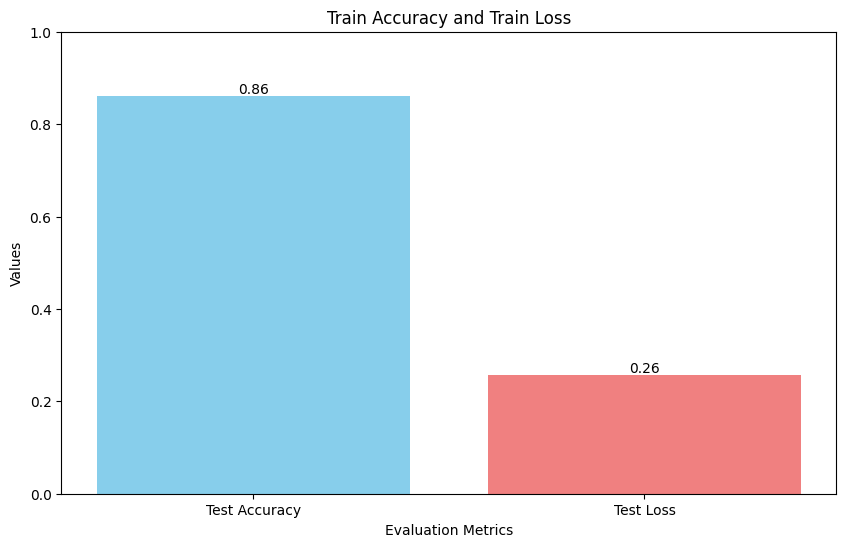

In [71]:
import matplotlib.pyplot as plt

# Test accuracy and loss values
test_acc = 0.8599391579627991
test_loss = 0.25690507888793945

# Metrics values
metrics_values = {
    'Test Accuracy': test_acc,
    'Test Loss': test_loss
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color=['skyblue', 'lightcoral'])
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Train Accuracy and Train Loss')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for better visualization

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [72]:
from sklearn import metrics
predlabel = myCNN1D4.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[27292  4379]
 [   86   122]]


In [113]:
tn, fp, fn, tp = confMat.ravel()
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

0.7648132414487555


In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Confusion matrix values
tn, fp, fn, tp = 27292, 4379, 86, 122

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

accuracy, precision, recall, f1, roc_auc

(0.8599391448916215,
 np.float64(0.02710508775827594),
 np.float64(0.5865384615384616),
 np.float64(0.05181567211722234),
 np.float64(0.724136585762758))

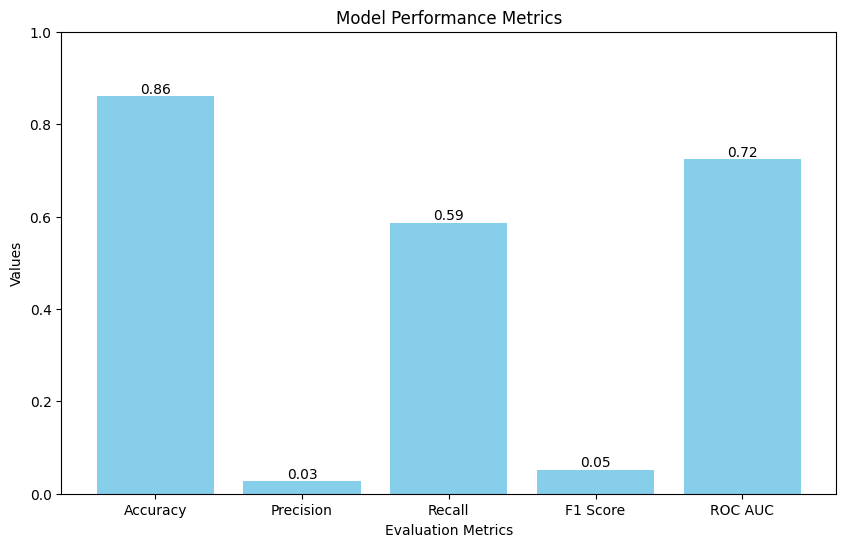

In [74]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## Input => Dense(64) => Conv(2) => Conv(4) = Conv(8) => Dense (2)

In [75]:
inputs = keras.layers.Input(shape=(x_train.shape[1], 1))
RS0 = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0 = keras.layers.Dense(64, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0 = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0 = keras.layers.Activation('relu')(BN0)
DP0 = keras.layers.Dropout(0.2)(AC0)
RS1 = keras.layers.Reshape((64, 1))(DP0)
FC1 = keras.layers.Conv1D(2, 3, strides=1)(RS1)
BN1 = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1 = keras.layers.Activation('relu')(BN1)
Pool1 = keras.layers.AveragePooling1D(pool_size=2)(AC1)
FC2 = keras.layers.Conv1D(4, 5, strides=1)(Pool1)
BN2 = keras.layers.BatchNormalization(axis=-1)(FC2)
AC2 = keras.layers.Activation('relu')(BN2)
Pool2 = keras.layers.AveragePooling1D(pool_size=2)(AC2)
FC3 = keras.layers.Conv1D(6, 7, strides=1)(Pool2)
BN3 = keras.layers.BatchNormalization(axis=-1)(FC3)
AC3 = keras.layers.Activation('relu')(BN3)
Pool3 = keras.layers.AveragePooling1D(pool_size=2)(AC3)
FL1 = keras.layers.Flatten()(Pool3)
FC4 = keras.layers.Dense(2)(FL1)
outputs = keras.layers.Activation('softmax')(FC4)
myCNN5D4 = keras.Model(inputs=inputs, outputs=outputs)
myCNN5D4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.006),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myCNN5D4.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 41, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_10 (Reshape)            │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_11 (Reshape)            │ (None, 64, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 62, 2)          │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 62, 2)          │             8 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 62, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_4             │ (None, 31, 2)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 27, 4)          │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 27, 4)          │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 27, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_5             │ (None, 13, 4)          │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 7, 6)           │           174 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 7, 6)           │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 7, 6)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_6             │ (None, 3, 6)           │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 18)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │            38 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,256 (12.72 KB)

 Trainable params: 3,104 (12.12 KB)

 Non-trainable params: 152 (608.00 B)

In [76]:
class_weight = {0: 1, 1: 3.0}

myCNN5D4.fit(x_train,y_train,epochs=60,verbose=1, class_weight=class_weight)

Epoch 1/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6934 - loss: 0.9351
Epoch 2/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7703 - loss: 0.6849
Epoch 3/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.6815
Epoch 4/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7541 - loss: 0.6892
Epoch 5/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7754 - loss: 0.6531
Epoch 6/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 0.6525
Epoch 7/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7711 - loss: 0.6489
Epoch 8/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7955 - loss: 0.6102
Epoch 9/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.6394
Epoch 10/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7954 - loss: 0.5958
Epoch 11/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7866 - loss: 0.6280
Epoch 12/60
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [77]:
test_loss,test_acc = myCNN5D4.evaluate(x_test,y_test)
print(test_acc)
print(test_loss)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.8052 - loss: 0.3827
0.8072084784507751
0.3856220543384552


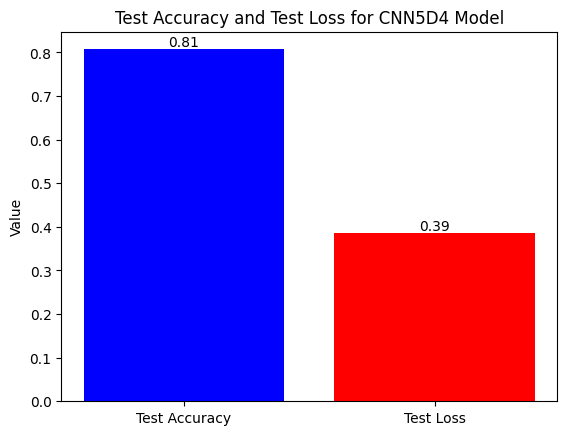

In [79]:
import matplotlib.pyplot as plt

# Values for test accuracy and test loss
test_acc = 0.8072084784507751
test_loss = 0.3856220543384552

# Labels for the x-axis
labels = ['Test Accuracy', 'Test Loss']

# Values for the y-axis
values = [test_acc, test_loss]

# Create a figure and axis
fig, ax = plt.subplots()

# Create bar chart
bars = ax.bar(labels, values, color=['blue', 'red'])

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Set labels and title
ax.set_ylabel('Value')
ax.set_title('Test Accuracy and Test Loss for CNN5D4 Model')

# Show plot
plt.show()

In [80]:
from sklearn import metrics
predlabel = myCNN5D4.predict(x_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(y_test,axis=1),f)
print(confMat)

997/997 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[[25591  6080]
 [   66   142]]


In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Confusion matrix values
tn, fp, fn, tp = confMat.ravel()

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.807208507167728
Precision: 0.022822243651558983
Recall: 0.6826923076923077
F1 Score: 0.04416796267496112
ROC AUC: 0.7453592888908319


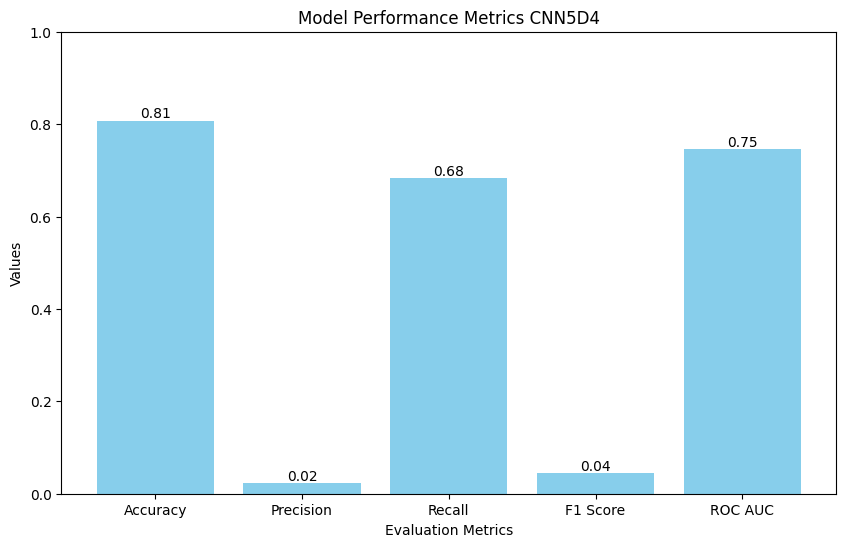

In [83]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics CNN5D4')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## SVM on subsampled data

In [84]:
from sklearn.svm import SVC
from sklearn import metrics

svcCAD = SVC(C=0.05, gamma=1/41, kernel='rbf', class_weight='balanced')
# C là hệ số điều chỉnh cho lỗi trong quá trình huấn luyện.
# Gamma điều chỉnh ảnh hưởng của từng điểm dữ liệu trong không gian đặc trưng.
# Hàm kernel RBF được sử dụng để ánh xạ dữ liệu vào không gian có chiều cao hơn để phân tách phi tuyến tính.
svcCAD.fit(x_train_org, y_train_org)
predlabel = svcCAD.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org, predlabel)
print(confMat)


[[22460  9211]
 [   31   177]]


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Confusion matrix values
tn, fp, fn, tp = confMat.ravel()

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.7100912826625678
Precision: 0.018853855986365572
Recall: 0.8509615384615384
F1 Score: 0.03689037098791163
ROC AUC: 0.7800638262861195


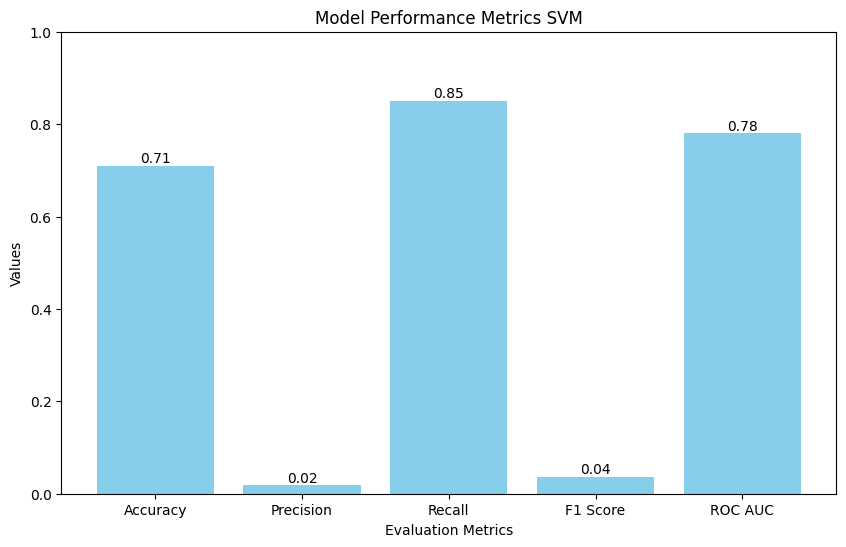

In [86]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics SVM')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

##  AdaBoost

In [87]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

adaboostCAD = AdaBoostClassifier(n_estimators=1000, random_state=0)
# Số lượng weak learners (cây quyết định nhỏ) được sử dụng trong mô hình = 1000
adaboostCAD.fit(x_train_org, y_train_org)
predlabel = adaboostCAD.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org, predlabel)
print(confMat)


c:\Users\baoho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[28128  3543]
 [  110    98]]


In [88]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Confusion matrix values
tn, fp, fn, tp = confMat.ravel()

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.8854104582954296
Precision: 0.026915682504806374
Recall: 0.47115384615384615
F1 Score: 0.050922317485061055
ROC AUC: 0.6796424720018072


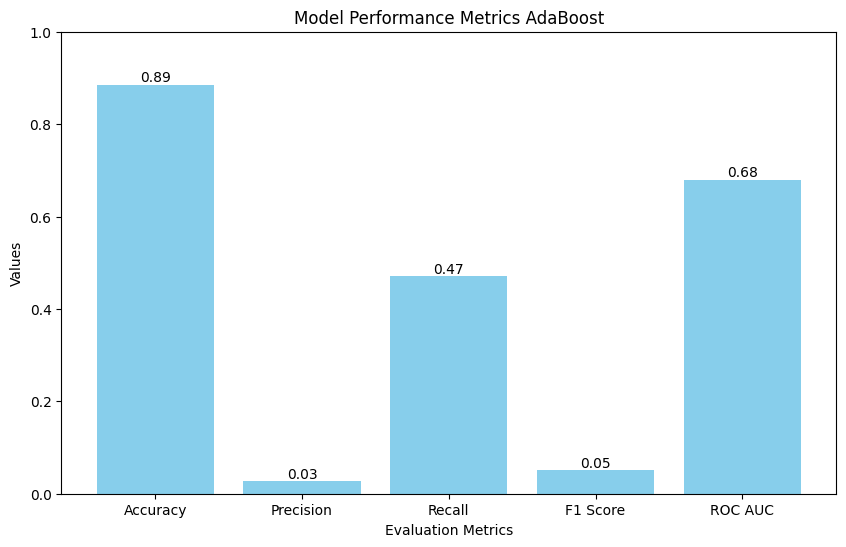

In [89]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics AdaBoost')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# GridSearchCV: Công cụ tìm kiếm tham số tối ưu bằng cách thử nghiệm nhiều tổ hợp siêu tham số và thực hiện cross-validation để đánh giá

parameters = {'n_estimators': (10, 30, 50, 100, 130, 160, 200), 'max_depth': (2, 3)}
# n_estimators: Số lượng cây trong rừng ngẫu nhiên
# max_depth = Độ sâu tối đa của mỗi cây quyết định

randomforestCAD = GridSearchCV(RandomForestClassifier(random_state=0, class_weight='balanced_subsample'),
                               parameters, cv=5)
randomforestCAD.fit(x_train_org, y_train_org)
predlabel = randomforestCAD.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org, predlabel)
print(confMat)



[[23848  7823]
 [   49   159]]


In [93]:
print(randomforestCAD.cv_results_)
print(randomforestCAD.best_estimator_)

{'mean_fit_time': array([0.03134775, 0.08394942, 0.13833895, 0.27100873, 0.35723481,
       0.43232207, 0.54998956, 0.03376722, 0.09807105, 0.15647597,
       0.31532712, 0.40972352, 0.5054678 , 0.6321063 ]), 'std_fit_time': array([0.00247547, 0.00510254, 0.0039877 , 0.00376862, 0.01564212,
       0.00695858, 0.0127982 , 0.00069465, 0.00095393, 0.00084916,
       0.00235768, 0.00326664, 0.00430076, 0.00403802]), 'mean_score_time': array([0.00139632, 0.00199471, 0.00334964, 0.00602279, 0.00790844,
       0.00981803, 0.01179562, 0.00117002, 0.0019937 , 0.00355568,
       0.00644751, 0.0081707 , 0.00980396, 0.01213593]), 'std_score_time': array([4.88694480e-04, 5.56082906e-07, 4.58112043e-04, 3.00161988e-04,
       1.14645560e-03, 1.04719159e-03, 2.10528161e-03, 3.47332507e-04,
       2.05317022e-06, 8.06698930e-04, 5.77119667e-04, 1.71262928e-04,
       7.13539025e-04, 9.57835980e-04]), 'param_max_depth': masked_array(data=[2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
             mask=[Fa

In [96]:
randomforestCADopt = RandomForestClassifier(
    bootstrap=True,
    class_weight='balanced_subsample',
    criterion='gini',
    max_depth=2,
    max_features='sqrt',  # Thay 'auto' bằng 'sqrt'
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=50,
    n_jobs=None,
    oob_score=False,
    random_state=0,
    verbose=0,
    warm_start=False
)

randomforestCADopt.fit(x_train_org, y_train_org)
predlabel = randomforestCADopt.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org, predlabel)
print(confMat)


[[23434  8237]
 [   38   170]]


In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Confusion matrix values
tn, fp, fn, tp = confMat.ravel()

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.7404247310141473
Precision: 0.020221244201260855
Recall: 0.8173076923076923
F1 Score: 0.03946604759141033
ROC AUC: 0.778613746378026


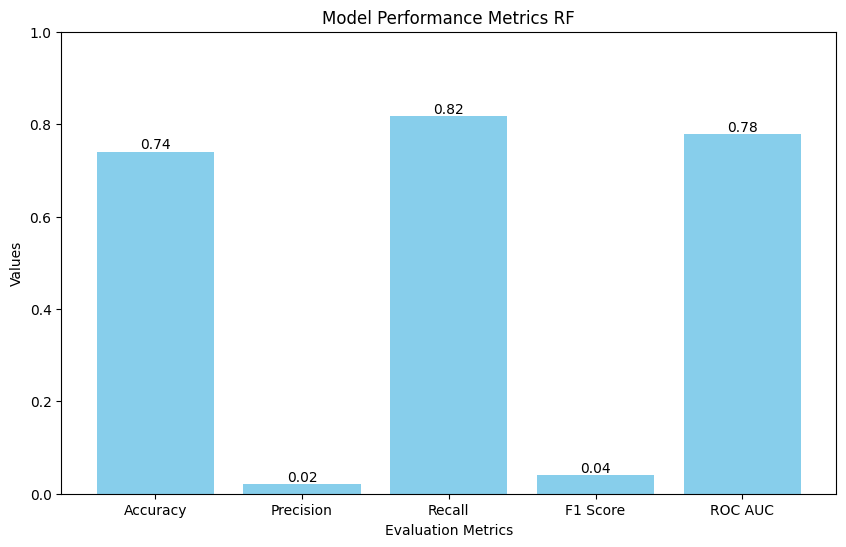

In [98]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics RF')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

## Logicstic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=100000, 
                         class_weight={0: 1, 1: 3.0}, verbose=1, random_state=2)
# solver='lbfgs' Là thuật toán tối ưu hóa được sử dụng để tìm nghiệm cho bài toán hồi quy logistic.
# lbfgs (Limited-memory BFGS) phù hợp với các bài toán có số lượng đặc trưng lớn và hoạt động tốt với mặc định.
model = clf.fit(x_train_org, y_train_org)


In [101]:
predlabel = model.predict(x_test_org)
confMat = metrics.confusion_matrix(y_test_org,predlabel)
print(confMat)

[[24173  7498]
 [   31   177]]


In [102]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Confusion matrix values
tn, fp, fn, tp = confMat.ravel()

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.7638257159885818
Precision: 0.023061889250814333
Recall: 0.8509615384615384
F1 Score: 0.04490676138525942
ROC AUC: 0.8071074939947489


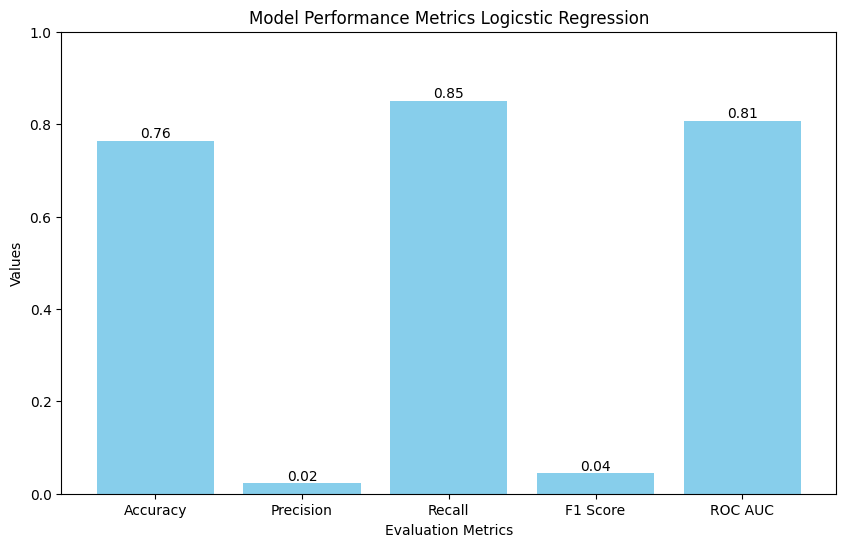

In [104]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics Logicstic Regression')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# Phần sau đây hiển thị kết quả khi 70% dữ liệu được sử dụng để đào tạo

In [105]:
# With train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(reduced_data, opLabel, test_size = 0.3, random_state = 24)

In [106]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [107]:
#%% one-hot-encoding
Y_train = keras.utils.to_categorical(Y_train,2)
Y_test  = keras.utils.to_categorical(Y_test,2)

In [109]:
# MLP -2
inputs = keras.layers.Input(shape=(x_train.shape[1],1))
RS0    = keras.layers.Reshape((x_train.shape[1], ))(inputs)
FC0    = keras.layers.Dense(512, bias_initializer=keras.initializers.VarianceScaling())(RS0)
BN0    = keras.layers.BatchNormalization(axis=-1)(FC0)
AC0    = keras.layers.Activation('relu')(BN0)
DP0    = keras.layers.Dropout(0.2)(AC0)

FC1    = keras.layers.Dense(128, bias_initializer=keras.initializers.VarianceScaling())(DP0)
BN1    = keras.layers.BatchNormalization(axis=-1)(FC1)
AC1    = keras.layers.Activation('relu')(BN1)
DP1    = keras.layers.Dropout(0.2)(AC1)


FC2 =   keras.layers.Dense(2, bias_initializer=keras.initializers.VarianceScaling())(DP1)
outputs = keras.layers.Activation('softmax')(FC2)

myMLP = keras.Model(inputs=inputs,outputs=outputs)
myMLP.compile(optimizer=keras.optimizers.Adam(learning_rate= 0.006),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
myMLP.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 41, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_13 (Reshape)            │ (None, 41)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │        21,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_31 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_32 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │           258 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_33 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,986 (351.51 KB)

 Trainable params: 88,706 (346.51 KB)

 Non-trainable params: 1,280 (5.00 KB)

In [110]:
np.where(Y_train==0)[0].shape
np.where(Y_train==1)[0].shape


(25955,)

In [111]:
class_weight = {0: 1, 1: 3}

myMLP.fit(X_train,Y_train,epochs=60,batch_size=1200,verbose=1, class_weight=class_weight)

Epoch 1/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8749 - loss: 0.5525
Epoch 2/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9393 - loss: 0.2776
Epoch 3/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9422 - loss: 0.2619
Epoch 4/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9523 - loss: 0.2451
Epoch 5/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9489 - loss: 0.2339
Epoch 6/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9543 - loss: 0.2310
Epoch 7/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9503 - loss: 0.2184
Epoch 8/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9541 - loss: 0.2167
Epoch 9/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9457 - loss: 0.2254
Epoch 10/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9551 - loss: 0.2081
Epoch 11/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9536 - loss: 0.1991
Epoch 12/60
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9490 - lo

In [112]:
test_loss,test_acc = myMLP.evaluate(X_test,Y_test)
print(test_acc)
print(test_loss)

348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step - accuracy: 0.9352 - loss: 0.3459
0.9351851940155029
0.3488776981830597


In [113]:
from sklearn import metrics
predlabel = myMLP.predict(X_test)
f = np.argmax(predlabel,axis=1)
confMat = metrics.confusion_matrix(np.argmax(Y_test,axis=1),f)
print(confMat)

348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[10327   332]
 [  389    76]]


In [114]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Confusion matrix values
tn, fp, fn, tp = confMat.ravel()

# True labels and predicted labels based on confusion matrix
y_true = [0] * (tn + fp) + [1] * (fn + tp)
y_pred = [0] * tn + [1] * fp + [0] * fn + [1] * tp

# Calculating metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9351851851851852
Precision: 0.18627450980392157
Recall: 0.16344086021505377
F1 Score: 0.17411225658648338
ROC AUC: 0.5661467365152575


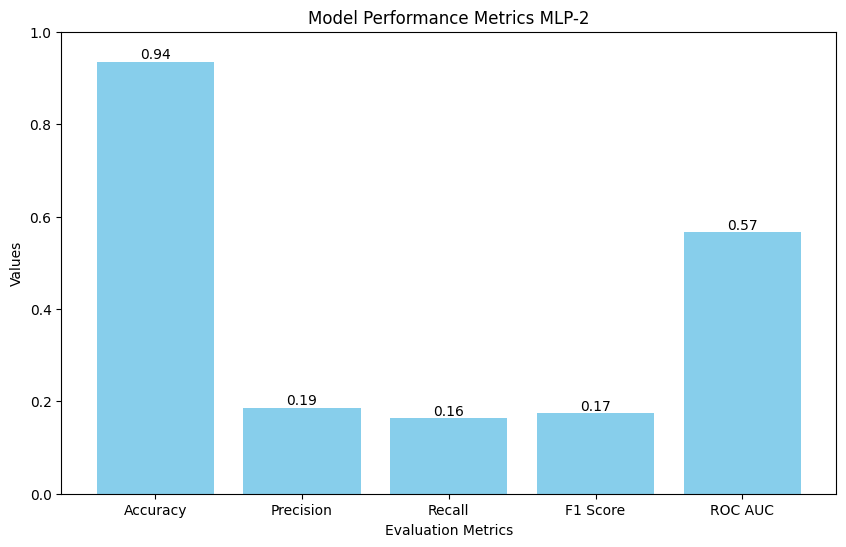

In [116]:
import matplotlib.pyplot as plt

# Metrics values
metrics_values = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC AUC': roc_auc
}

# Plotting the metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_values.keys(), metrics_values.values(), color='skyblue')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics MLP-2')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1

# Adding value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()